# **Case Study: Predicting Apartment Prices from Layout Characteristics**

Analysis notebook file for the case study of SAMOLET recruitment process.

**Several Notes:** 

- I used some of my own personal scripts for data analysis and preprocessing that can be found in the `src.core/` folder.
- Running this notebook will save the model artifacts in the `models/` folder and will save the test set that we will be using for the final evaluation in the `data/` folder.
- This notebook follows best practices to prevent data leakage by splitting data early and applying all preprocessing mostly only on training data.

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Settings
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [ ]:
# Load dataset
df_raw = pd.read_csv('data/regression_data_2.csv', low_memory=False)

# Create a copy of the dataframe
df = df_raw.copy()

In [3]:
# Check the first few rows of the dataset
df.head()

,District,Address,Class,HouseNumber,Building,Plot,FloorsTotal,HandoverDate,Phase,BuildingType,InstallmentUntil,InstallmentMonths,Number,PIBNumber,LayoutType,Axis,Floor,Section,PropertyType,PropertyCategory,Apartments,Finishing,Status,ApartmentOption,Mortgage,Subsidies,Layout,CeilingHeight,TotalArea,AreaWithoutBalcony,LivingArea,KitchenArea,HallwayArea,BathroomArea,BalconyArea,PlotArea,PricePerMeter,TotalCost,Developer_encoded,Complex_encoded
0,МО Ленинский г.о.,"Сапроново д., Калиновая ул.",Комфорт,NaN,1,NaN,25,Сдан,1,Монолит,NaN,NaN,121,NaN,NaN,NaN,11,3,3 ккв,Многокв. дом,Нет,Чистовая,В продаже,Новостройка,Да,Нет,Да,2.8,76.1,74.1,43.7,12.2,13.5,"3,4с+1,3т","3,4л",0.0,266300.0,20265430.0,Developer58,Complex0
1,МО Ленинский г.о.,"Сапроново д., Калиновая ул.",Комфорт,NaN,1,NaN,25,Сдан,1,Монолит,NaN,NaN,144,NaN,NaN,NaN,16,3,3 ккв (Евро),Многокв. дом,Нет,Чистовая,В продаже,Новостройка,Да,Нет,Да,2.8,70.2,68.5,25.1,25.4,10.2,"3,4с+2т",3л,0.0,270900.0,19017180.0,Developer58,Complex0
2,МО Ленинский г.о.,"Сапроново д., Калиновая ул.",Комфорт,NaN,1,NaN,25,Сдан,1,Монолит,NaN,NaN,247,NaN,NaN,NaN,13,4,3 ккв,Многокв. дом,Нет,Чистовая,В продаже,Новостройка,Да,Нет,Да,2.8,77.9,75.8,43.9,13.4,13.6,"3,5с+1,4т","4,3б",0.0,264900.0,20635710.0,Developer58,Complex0
3,МО Ленинский г.о.,"Сапроново д., Калиновая ул.",Комфорт,NaN,1,NaN,25,Сдан,1,Монолит,NaN,NaN,153,NaN,NaN,NaN,19,3,3 ккв,Многокв. дом,Нет,Чистовая,В продаже,Новостройка,Да,Нет,Да,2.8,76.1,74.1,43.7,12.2,13.5,"3,4с+1,3т","3,4л",0.0,267300.0,20341530.0,Developer58,Complex0
4,МО Ленинский г.о.,"Сапроново д., Калиновая ул.",Комфорт,NaN,1,NaN,25,Сдан,1,Монолит,NaN,NaN,296,NaN,NaN,NaN,20,4,3 ккв,Многокв. дом,Нет,Чистовая,В продаже,Новостройка,Да,Нет,Да,2.8,77.9,75.8,43.9,13.4,13.6,"3,5с+1,4т","4,3б",0.0,266400.0,20752560.0,Developer58,Complex0


In [4]:
# Check the dataset information
from src.core import check_data_information
check_data_information(df, cols=df.columns)

,Feature,Data Type,Null Values,Null Percentage,Zero Values,Zero Percentage,Negative Values,Negative Percentage,Empty Strings,Numeric in Object,Duplicated Values,Unique Values,Cardinality Ratio,Unique Sample
0,District,str,0,0.00,0,0.00,0,0.00,0,0,0,113,0.0019,"МО Ленинский г.о., Гольяново р-н, Молжаниновск..."
1,Address,str,0,0.00,0,0.00,0,0.00,0,0,0,323,0.0054,"Сапроново д., Калиновая ул., Москва г., Амурск..."
2,Class,str,0,0.00,0,0.00,0,0.00,0,0,0,4,0.0001,"Комфорт, Бизнес, Элит, Эконом"
3,HouseNumber,str,57660,97.22,0,0.00,0,0.00,0,830,0,29,0.0005,"nan, N, E, 1, 3"
4,Building,str,91,0.15,0,0.00,0,0.00,0,47827,0,507,0.0085,"1, 2, 4, 5, 3"
5,Plot,str,56249,94.84,0,0.00,0,0.00,0,967,0,49,0.0008,"nan, 1, 2, 3, 5"
6,FloorsTotal,int64,0,0.00,0,0.00,0,0.00,0,0,0,66,0.0011,"25, 24, 32, 15, 1"
7,HandoverDate,str,0,0.00,0,0.00,0,0.00,0,0,0,19,0.0003,"Сдан, 2026 г. 4 кв., 2027 г. 1 кв., 2027 г. 2 ..."
8,Phase,int64,0,0.00,0,0.00,0,0.00,0,0,0,28,0.0005,"1, 2, 3, 4, 5"
9,BuildingType,str,0,0.00,0,0.00,0,0.00,0,0,0,6,0.0001,"Монолит, Кирпич + Монолит, Панель, Монолит + П..."


In [5]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 59310
Number of columns: 40


**Initial preprocessing steps for EDA:**

1. Drop columns with large percentage of missing values and anomaly values
    - Missing values: `HouseNumber`, `Plot`, `InstallmentUntil`, `InstallmentMonths`, `PIBNumber`, `LayoutType`, `Axis`
    - Anomaly values: `PlotArea`, `Status`
2. Select relevant features based on requirements and define target column
3. Basic data exploration (univariate and bivariate analysis)
4. Analysis geographical features

**Note:** We perform minimal cleaning here to understand the data. Heavy preprocessing (outlier removal, encoding, scaling) will be done **AFTER** splitting to prevent data leakage.

In [6]:
# Define features and target
target = "TotalCost"

# Numerical features
numerical_features = [
    "FloorsTotal", "Phase", "Floor",
    "CeilingHeight", "TotalArea", "AreaWithoutBalcony",
    "LivingArea", "KitchenArea", "HallwayArea"
]

# Categorical features
categorical_features = [
    "Class", "BuildingType", "PropertyType",
    "PropertyCategory", "Apartments", "Finishing",
    "ApartmentOption", "Mortgage", "Subsidies", "Layout"
]

print(f"Target: {target}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Filter out the columns based on findings in data information
df = df[numerical_features + categorical_features + [target]]

Target: TotalCost
Numerical features: 9
Categorical features: 10


## Univariate Analysis

**Purpose:** Understand distributions and basic statistics of features before splitting.

### Numerical Features

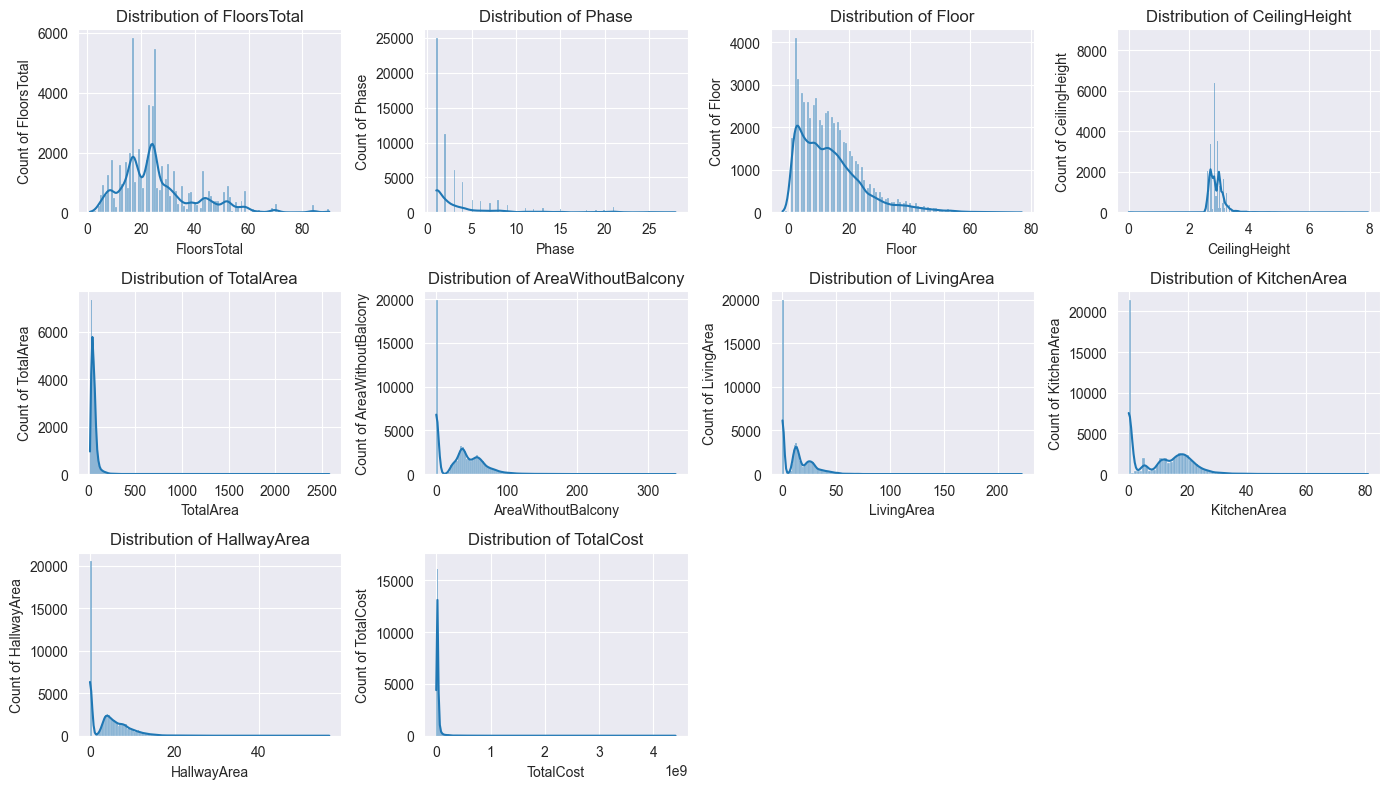

,Feature,overall_count,overall_mean,overall_std,overall_min,overall_25%,overall_50%,overall_75%,overall_max,overall_range,overall_IQR,overall_CV,overall_skewness,overall_kurtosis
0,FloorsTotal,59310.0,2.588585e+01,1.388798e+01,1.00,1.700000e+01,24.00,3.100000e+01,9.000000e+01,8.900000e+01,1.400000e+01,53.650846,1.232002,1.960952
1,Phase,59310.0,3.717012e+00,4.694703e+00,1.00,1.000000e+00,2.00,4.000000e+00,2.800000e+01,2.700000e+01,3.000000e+00,126.303131,2.660747,7.368455
2,Floor,59310.0,1.392925e+01,1.070029e+01,-2.00,6.000000e+00,12.00,1.900000e+01,7.700000e+01,7.900000e+01,1.300000e+01,76.818811,1.343070,2.273952
3,CeilingHeight,59310.0,2.942427e+00,3.575918e-01,0.00,2.730000e+00,2.85,3.020000e+00,7.950000e+00,7.950000e+00,2.900000e-01,12.152954,4.884894,47.053118
4,TotalArea,59310.0,6.016602e+01,6.056298e+01,16.88,3.790000e+01,52.00,6.860000e+01,2.575600e+03,2.558720e+03,3.070000e+01,100.659765,20.505493,594.172644
5,AreaWithoutBalcony,59310.0,3.365771e+01,2.955809e+01,0.00,0.000000e+00,35.50,5.490000e+01,3.395000e+02,3.395000e+02,5.490000e+01,87.819677,0.609190,0.802307
6,LivingArea,59310.0,1.433786e+01,1.403508e+01,0.00,0.000000e+00,12.70,2.350000e+01,2.224000e+02,2.224000e+02,2.350000e+01,97.888246,1.378936,6.546446
7,KitchenArea,59310.0,1.042644e+01,9.606334e+00,0.00,0.000000e+00,11.00,1.820000e+01,8.110000e+01,8.110000e+01,1.820000e+01,92.134339,0.474949,-0.174241
8,HallwayArea,59310.0,4.416951e+00,4.226414e+00,0.00,0.000000e+00,4.10,7.100000e+00,5.662000e+01,5.662000e+01,7.100000e+00,95.686220,1.050524,3.286216
9,TotalCost,59310.0,3.575734e+07,8.372878e+07,0.00,1.380328e+07,21888274.00,3.309222e+07,4.408750e+09,4.408750e+09,1.928894e+07,234.158263,16.115852,439.351000


In [12]:
# Checking the distribution and statistical summary of the numerical values
from src.core import plot_dynamic_hisplots_kdeplots, describe_numerical_combined
plot_dynamic_hisplots_kdeplots(df=df, col_series=numerical_features + [target], ncols=4, figsize=(14, 8))

# Display the overall statistics for numerical columns
numerical_summary = describe_numerical_combined(df, numerical_features + [target])
display(numerical_summary)

### Categorical Features

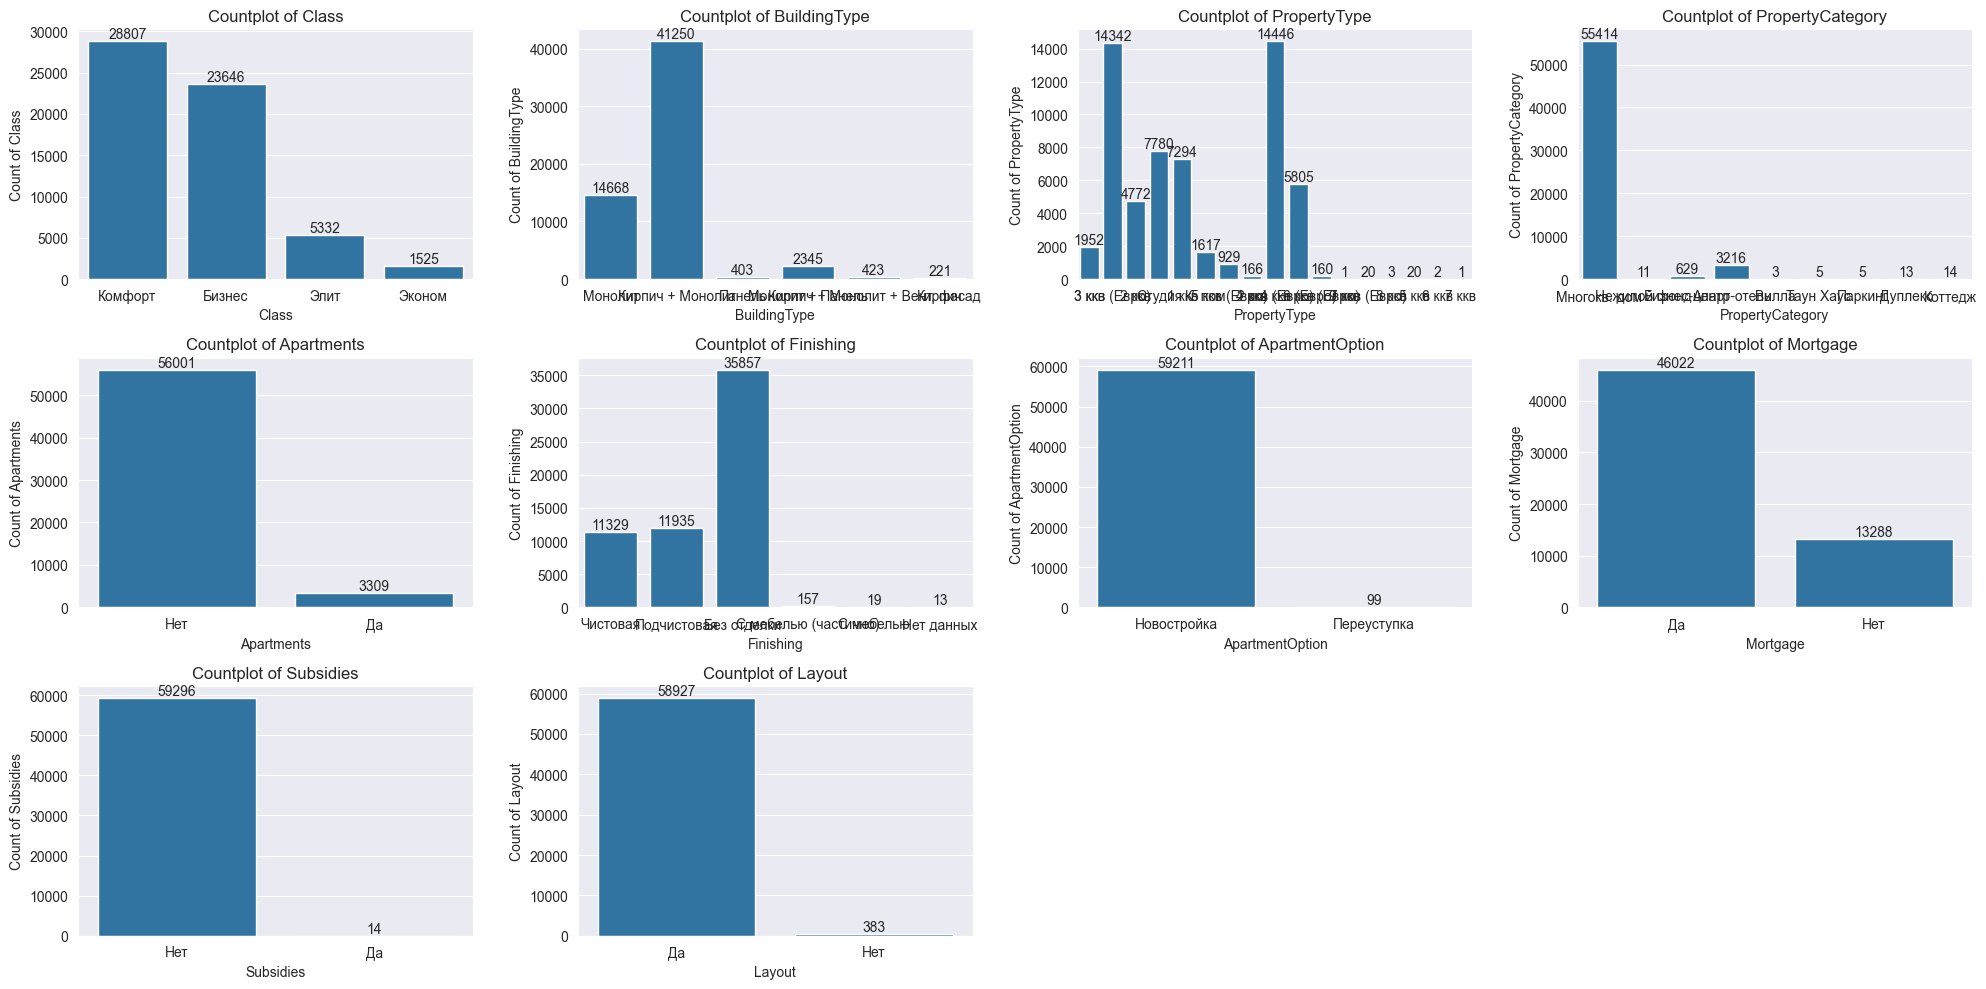

,Feature,overall_count,overall_unique,overall_top,overall_freq,overall_bottom,overall_freq_bottom,overall_top_percentage,overall_bottom_percentage,overall_n_categories
0,Class,59310,4,Комфорт,28807,Эконом,1525,48.57,2.57,4
1,BuildingType,59310,6,Кирпич + Монолит,41250,Кирпич,221,69.55,0.37,6
2,PropertyType,59310,17,2 ккв (Евро),14446,9 ккв,1,24.36,0.00,17
3,PropertyCategory,59310,9,Многокв. дом,55414,Вилла,3,93.43,0.01,9
4,Apartments,59310,2,Нет,56001,Да,3309,94.42,5.58,2
5,Finishing,59310,6,Без отделки,35857,Нет данных,13,60.46,0.02,6
6,ApartmentOption,59310,2,Новостройка,59211,Переуступка,99,99.83,0.17,2
7,Mortgage,59310,2,Да,46022,Нет,13288,77.60,22.40,2
8,Subsidies,59310,2,Нет,59296,Да,14,99.98,0.02,2
9,Layout,59310,2,Да,58927,Нет,383,99.35,0.65,2


In [ ]:
# Checking the distribution and statistical summary of the categorical values
from src.core import describe_categorical_combined, plot_dynamic_countplot

# Countplot function implementation
plot_dynamic_countplot(df=df, col_series=[col for col in categorical_features], ncols=4, figsize=(20, 10))

# Display the overall statistics for categorical columns
categorical_summary = describe_categorical_combined(df, categorical_features)
display(categorical_summary)

## Bivariate/Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

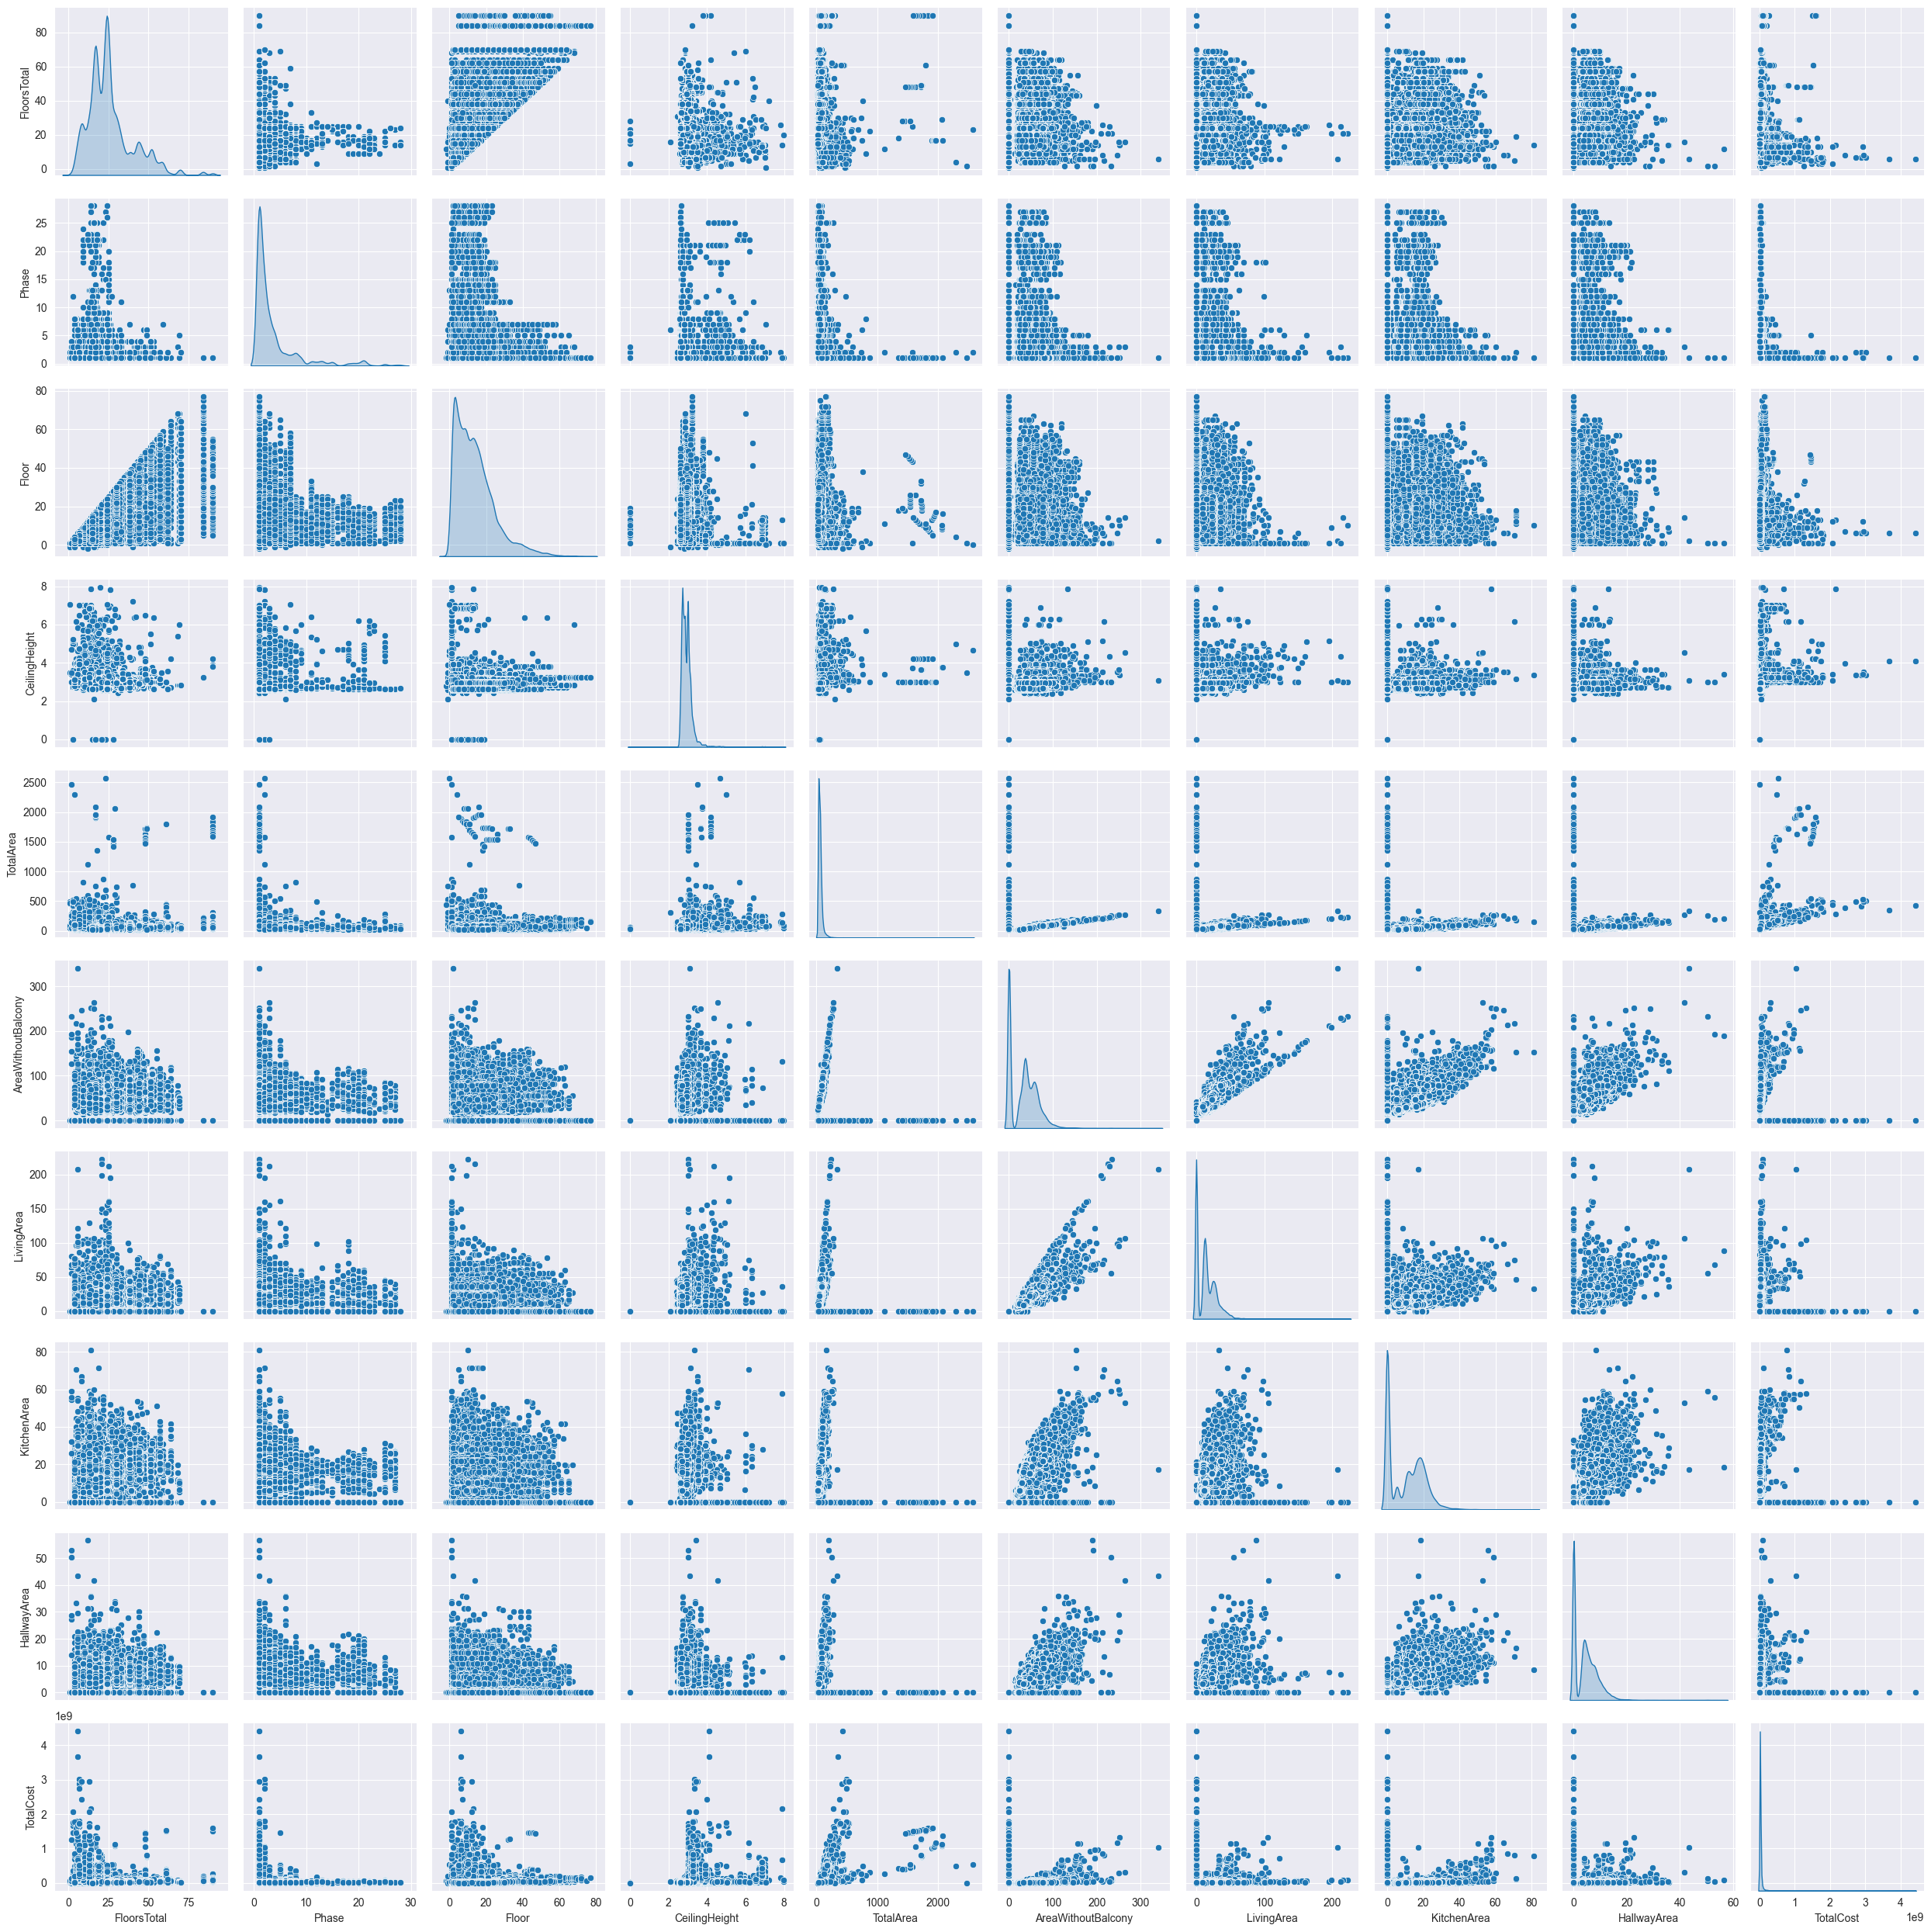

In [9]:
# Checking pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(data=df, diag_kind='kde')
plt.tight_layout()
plt.show()

We will try further inspection using correlation heatmap with Spearman and Kendall methods based on the pairplot result.

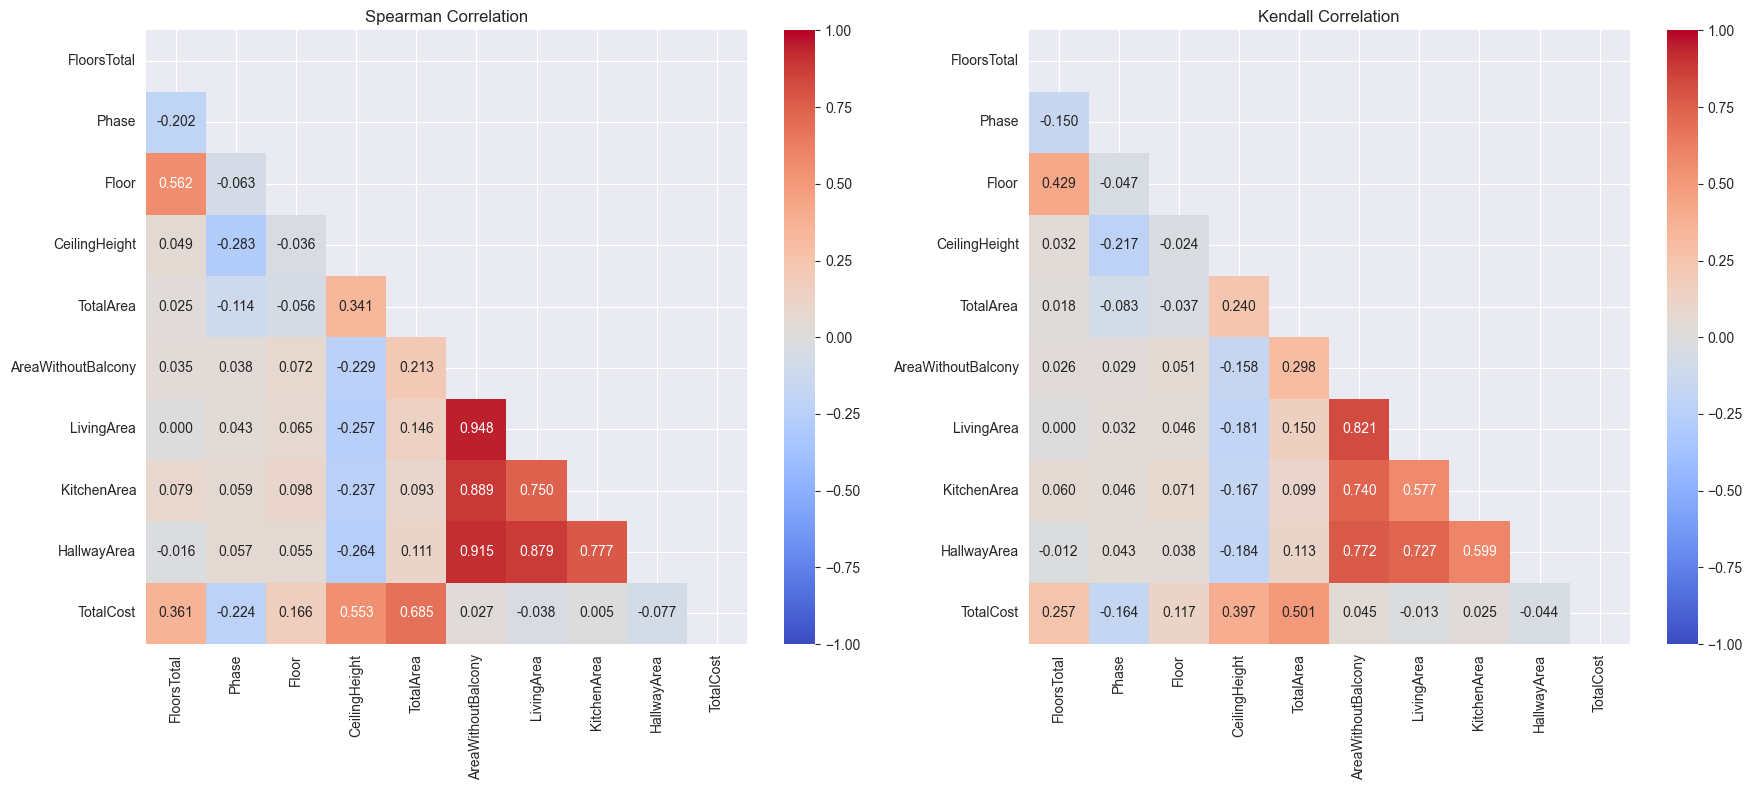

In [10]:
# Correlation heatmap of numerical features and target
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Plot correlation heatmap with Spearman method
sns.heatmap(data=df.corr(method='spearman', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Spearman Correlation')

# Plot correlation heatmap with Kendall method
sns.heatmap(data=df.corr(method='kendall', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

## Geographical Features Analysis

There are only 2 features related to geo in this dataset (`District` and `Address`). I initially didnt include them since they are a type of categorical feature that have many unique values and encoding them will need quite a lot of work. But, we will check their values a little bit.

In [11]:
# Create a new dataframe along with our target just in case
df_geo = df_raw[["District", "Address", target]]
df_geo.sample(5)

,District,Address,TotalCost
37339,Западный р-н,"Москва г., Производственная ул.",1.795691e+07
42111,Сосенское пос.,"Коммунарка п., Бачуринская ул.",2.315040e+07
33176,МО Красногорский р-н,"Ильинское-Усово п., Заповедная ул.",1.112808e+07
14582,МО Красногорский р-н,"Ильинское-Усово п., Новорижское ш.",2.272660e+07
57511,Хамовники р-н,"Москва г., Фрунзенская наб.",1.865600e+08


,Feature,Data Type,Null Values,Null Percentage,Zero Values,Zero Percentage,Negative Values,Negative Percentage,Empty Strings,Numeric in Object,Duplicated Values,Unique Values,Cardinality Ratio,Unique Sample
0,District,str,0,0.0,0,0.00,0,0.0,0,0,7203,113,0.0019,"МО Ленинский г.о., Гольяново р-н, Молжаниновск..."
1,Address,str,0,0.0,0,0.00,0,0.0,0,0,7203,323,0.0054,"Сапроново д., Калиновая ул., Москва г., Амурск..."
2,TotalCost,float64,0,0.0,4,0.01,0,0.0,0,0,7203,51708,0.8718,"20265430.0, 19017180.0, 20635710.0, 20341530.0..."


,Feature,overall_count,overall_unique,overall_top,overall_freq,overall_bottom,overall_freq_bottom,overall_top_percentage,overall_bottom_percentage,overall_n_categories
0,District,59310,113,МО Ленинский г.о.,3181,Котловка р-н,3,5.36,0.01,113
1,Address,59310,323,"Сапроново д., Калиновая ул.",1615,"Люберцы г., Шоссейная ул.",1,2.72,0.00,323


Geographical Features Values Distribution:

District:


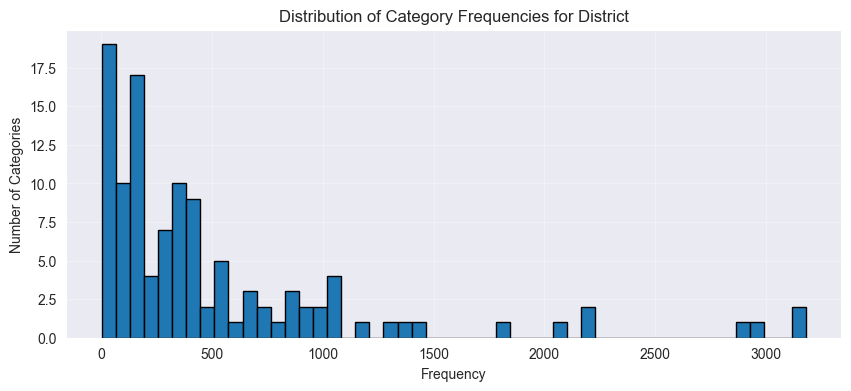


Address:


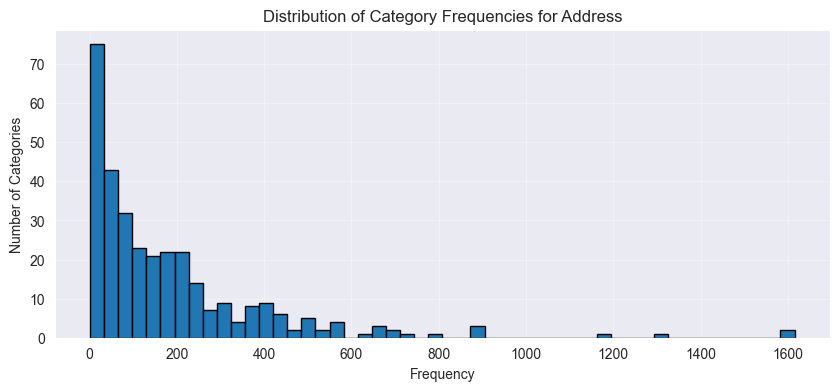

In [12]:
# Check data information of these columns
geo_info = check_data_information(df_geo, cols=df_geo.columns)
display(geo_info)

# Display the overall statistics for categorical columns
geo_summary = describe_categorical_combined(df_geo, df_geo[["District", "Address"]].columns)
display(geo_summary)

# Check the values distribution of the categorical features
print("Geographical Features Values Distribution:")
for col in df_geo.select_dtypes(include=["str", "object"]):
    print(f"\n{col}:")
    value_counts = df_geo[col].value_counts()
    
    # Plot distribution of counts
    plt.figure(figsize=(10, 4))
    plt.hist(value_counts.values, bins=50, edgecolor='black')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Categories')
    plt.title(f'Distribution of Category Frequencies for {col}')
    plt.grid(True, alpha=0.3)
    plt.show()

Looking at the values I think we will try to only include the `District` since it is more general. As for the encoding of this column later there are several options like mean encoding or frequency encoding. But we will probably try with mean encoding that replace each category with the mean of the target variable for that category. This is used and potentially works well when there's a relationship between the category and target (districts likely correlate with apartment prices).

In [13]:
# Add district column into the main dataframe as the first column
df.insert(0, 'District', df_raw['District'])

# **STAGE 2: BASIC DATA CLEANING**

**Purpose:** Minimal cleaning before splitting - only remove obvious data quality issues. There are potentially several more things that could be added later here, but for now I only impement simple data cleaning base on our findings before.

**Why here?** 
- Dropping rows with missing target or impossible values (negative floors) is a data quality fix, not a modeling decision
- These operations don't use statistics from the data that could leak information

In [14]:
# Drop leftover missing rows in target (can't train without target), just in case if there will be this problem in the future data
df = df.dropna(subset=[target]).copy()

# Remove rows with impossible values (negative floor numbers)
df = df[df['Floor'] >= 0].copy()

print(f'Dataset shape after basic cleaning: {df.shape}')

Dataset shape after basic cleaning: (59282, 21)


# **STAGE 3: DATA SPLITTING (CRITICAL STEP)**

**Splitting BEFORE preprocessing prevents data leakage:**

1. **Outlier Removal:** If we calculate IQR on full dataset, test set statistics influence training decisions
2. **Feature Encoding:** Category frequencies from test set shouldn't inform training
3. **Feature Selection:** Correlation/importance scores using test data = cheating
4. **Scaling:** Already doing this correctly, but must come after split

**Principle:** Test set should be completely unseen until final evaluation. It should simulate future data where we don't know the answers.

## Split Strategy: 75% Train, 20% Validation, 5% Test

- **Training (75%):** Fit all preprocessing steps and train models
- **Validation (20%):** Tune hyperparameters and select best model
- **Test (5%):** Final evaluation only, never touched during development

In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_raw = df.drop(columns=[target])
y_raw = df[target]

# First split: 75% train, 25% temp (which will become val + test)
X_train_raw, X_temp_raw, y_train_raw, y_temp_raw = train_test_split(
    X_raw, y_raw, 
    test_size=0.25, 
    random_state=42,
    stratify=X_raw['Class']  # Stratify by Class to ensure representative distribution
)

# Second split: Split temp into 80% validation (20% of original) and 20% test (5% of original)
X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(
    X_temp_raw, y_temp_raw, 
    test_size=0.2, 
    random_state=42
)

# Display split sizes
total_samples = len(X_raw)
print(f"Total samples: {total_samples:,}")
print(f"\nTraining set: {len(X_train_raw):,} samples ({len(X_train_raw)/total_samples*100:.1f}%)")
print(f"Validation set: {len(X_val_raw):,} samples ({len(X_val_raw)/total_samples*100:.1f}%)")
print(f"Test set: {len(X_test_raw):,} samples ({len(X_test_raw)/total_samples*100:.1f}%)")

# Save RAW test set immediately (before any preprocessing)
# This is what we'll use for final inference in the Gradio app
df_test_raw = pd.concat([X_test_raw.reset_index(drop=True), y_test_raw.reset_index(drop=True)], axis=1)
df_test_raw.to_csv('data/test_data_5%_raw.csv', index=False)
print(f"\nRaw test data saved to: data/test_data_5%_raw.csv")
print("⚠️ This file contains UNPROCESSED test data for inference.")

Total samples: 59,282

Training set: 44,461 samples (75.0%)
Validation set: 11,856 samples (20.0%)
Test set: 2,965 samples (5.0%)

Raw test data saved to: data/test_data_5%_raw.csv
⚠️ This file contains UNPROCESSED test data for inference.


# **STAGE 4: DATA PREPROCESSING (TRAIN + VAL ONLY)**

From this point forward:
- All preprocessing is **fitted on training data only**
- Validation and test sets are **transformed** using training statistics
- We never look at test set until final evaluation

## Outlier Detection and Removal

**Why after split?** IQR thresholds calculated from training data only. If we used full dataset, test set extreme values would influence what we consider "outliers" in training.

Amount of Rows: 44461
Amount of Outlier Rows (Across All Columns): 12018
Amount of Non-Outlier Rows (Across All Columns): 32443
Percentage of Outliers: 27.03%



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data,Outlier Percentage (%)
0,FloorsTotal,True,-4.000000e+00,5.200000e+01,2362,42099,5.31
1,Phase,True,-3.500000e+00,8.500000e+00,4593,39868,10.33
2,Floor,True,-1.350000e+01,3.850000e+01,1700,42761,3.82
3,CeilingHeight,True,2.295000e+00,3.455000e+00,1680,42781,3.78
4,TotalArea,True,-8.150000e+00,1.146500e+02,2113,42348,4.75
5,AreaWithoutBalcony,True,-8.235000e+01,1.372500e+02,140,44321,0.31
6,LivingArea,True,-3.525000e+01,5.875000e+01,271,44190,0.61
7,KitchenArea,True,-2.730000e+01,4.550000e+01,86,44375,0.19
8,HallwayArea,True,-1.065000e+01,1.775000e+01,258,44203,0.58
9,TotalCost,True,-1.506562e+07,6.189742e+07,3571,40890,8.03


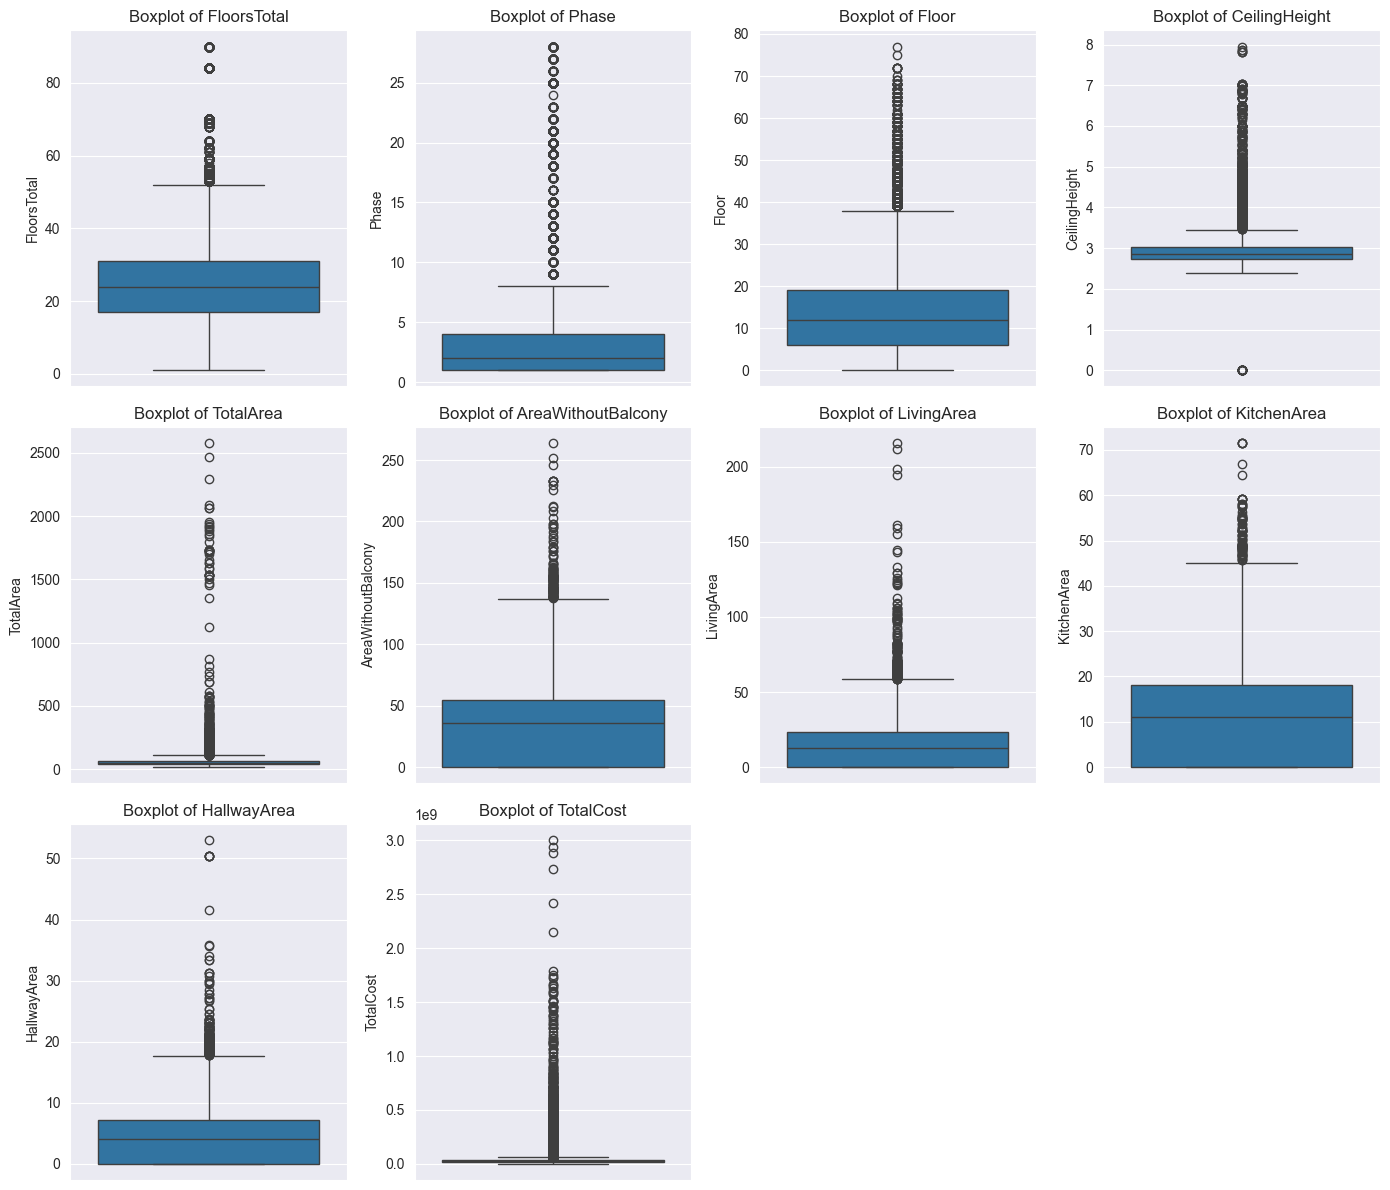

In [ ]:
from src.core import plot_dynamic_boxplots_violinplots, filter_outliers

# Combine train features and target for outlier detection
df_train = pd.concat([X_train_raw, y_train_raw], axis=1)

# Check outliers on TRAINING data only
check_outliers_cols = numerical_features + [target]
summary = filter_outliers(df_train, columns=check_outliers_cols, threshold=1.5, detect_only=True)
display(summary)

# Visualize outliers in training data
plot_dynamic_boxplots_violinplots(df_train, check_outliers_cols, plot_type="boxplot", ncols=4, orientation="v", figsize=(14, 12))

In [17]:
# Remove outliers from TRAINING data and get IQR limits
# These limits will be applied to validation data to ensure consistent distributions
# (This prevents data leakage by using only training statistics)

# Step 1: Get IQR limits from training data
train_outlier_summary = filter_outliers(df_train, columns=check_outliers_cols, method='iqr', threshold=1.5, detect_only=True, verbose=False)

# Step 2: Remove outliers from training data
df_train_clean = filter_outliers(df_train, columns=check_outliers_cols, method='iqr', threshold=1.5, detect_only=False)
X_train_clean = df_train_clean.drop(columns=[target])
y_train_clean = df_train_clean[target]

# Step 3: Apply SAME IQR limits to validation data (using training-derived thresholds)
# This ensures validation set has the same distribution as training, preventing the mismatch issue
def filter_using_training_limits(data, columns, limits_df):
    """
    Filter outliers using pre-computed IQR limits from training data.
    This prevents data leakage while ensuring consistent distributions.
    """
    mask = pd.Series([True] * len(data), index=data.index)
    
    for _, row in limits_df.iterrows():
        col = row['Column Name']
        if col in columns and col in data.columns:
            lower = row['Lower Limit']
            upper = row['Upper Limit']
            col_mask = (data[col] >= lower) & (data[col] <= upper)
            mask = mask & col_mask
    
    return data[mask]

# Combine validation features and target for filtering
df_val = pd.concat([X_val_raw, y_val_raw], axis=1)
df_val_clean = filter_using_training_limits(df_val, check_outliers_cols, train_outlier_summary)

# Split back into X and y
X_val_clean = df_val_clean.drop(columns=[target])
y_val_clean = df_val_clean[target]

print(f"Training samples after outlier removal: {len(X_train_clean):,}")
print(f"Removed {len(X_train_raw) - len(X_train_clean):,} outlier samples from training set")
print(f"\nValidation samples after applying training limits: {len(X_val_clean):,}")
print(f"Removed {len(X_val_raw) - len(X_val_clean):,} outlier samples from validation set")
print(f"\nTest set: {len(X_test_raw):,} (unchanged - for final evaluation only)")

Training samples after outlier removal: 32,443
Removed 12,018 outlier samples from training set

Validation samples after applying training limits: 8,622
Removed 3,234 outlier samples from validation set

Test set: 2,965 (unchanged - for final evaluation only)


## Feature Encoding

**Why after split?** 
- Ordinal encoding order is a modeling decision
- One-hot encoding creates categories based on unique values - test set categories shouldn't influence this
- Target encoding for high-cardinality features (District) uses target statistics from training data only
- We fit encoders on training data, then apply to val/test

**Encoding Strategy:**
- **Ordinal Encoding**: For ordered categories (Class, Finishing)
- **One-Hot Encoding**: For nominal categories with low cardinality
- **Mean Encoding**: For high-cardinality features like District (113 unique values)
  - Replaces each district with the mean TotalCost for that district
  - Uses smoothing (min_samples_leaf=10, smoothing=1.0) to prevent overfitting on rare categories

In [ ]:
# Define encoding strategy
ordinal_cols = ["Class", "Finishing"]
ordinal_categories = {
    "Class": ["Эконом", "Комфорт", "Бизнес", "Элит"],
    "Finishing": ["Нет данных", "Без отделки", "Подчистовая", "Чистовая", "С мебелью (частично)", "С мебелью"]
}

nominal_cols = ["BuildingType", "PropertyType", "PropertyCategory", "Apartments", 
                "ApartmentOption", "Mortgage", "Subsidies", "Layout"]

# Mean encoding columns (for high-cardinality geographical feature)
# Uses sklearn's TargetEncoder with built-in cross-fitting to prevent data leakage
mean_encoding_cols = ["District"]

# FIT encoders on TRAINING data only (unified encoding function)
from src.core import feature_encoding

# Encode training data - FIT all encoders (ordinal, one-hot, mean)
# mean_target_type='continuous' for regression tasks
# mean_smooth='auto' uses empirical Bayes for automatic smoothing
# mean_cv=5 uses 5-fold cross-fitting to prevent data leakage
X_train_encoded, encoders = feature_encoding(
    data=X_train_clean.copy(),
    ordinal_columns=ordinal_cols,
    nominal_columns=nominal_cols,
    mean_encoding_columns=mean_encoding_cols,
    ordinal_categories=ordinal_categories,
    target=y_train_clean,
    mean_target_type='continuous',
    mean_smooth='auto',
    mean_cv=5,
    handle_unknown='ignore'
)

# Encode validation data - TRANSFORM using fitted encoders
X_val_encoded, _ = feature_encoding(
    data=X_val_clean.copy(),
    ordinal_columns=ordinal_cols,
    nominal_columns=nominal_cols,
    mean_encoding_columns=mean_encoding_cols,
    ordinal_categories=ordinal_categories,
    encoders=encoders,
    handle_unknown='ignore'
)

# Encode test data - TRANSFORM using fitted encoders
X_test_encoded, _ = feature_encoding(
    data=X_test_raw.copy(),
    ordinal_columns=ordinal_cols,
    nominal_columns=nominal_cols,
    mean_encoding_columns=mean_encoding_cols,
    ordinal_categories=ordinal_categories,
    encoders=encoders,
    handle_unknown='ignore'
)

print(f"Encoded features shape: {X_train_encoded.shape}")
print(f"One-hot encoding created {len([c for c in X_train_encoded.columns if any(c.startswith(f'{nc}_') for nc in nominal_cols)])} additional columns")
print(f"Mean encoding applied to: {mean_encoding_cols}")

Encoded features shape: (32443, 33)
One-hot encoding created 21 additional columns
Mean encoding applied to: ['District']


## Feature Selection

**Why after split?** 
- Correlation analysis using test data = data leakage
- Feature importance scores should only reflect training data patterns
- Selected features must be based on train set only

In [ ]:
from src.core import calculate_correlation_tabular

# Combine train data for correlation analysis
df_train_encoded = pd.concat([X_train_encoded, y_train_clean.reset_index(drop=True)], axis=1)

# Calculate correlation on TRAINING data only
feature_feature_df, feature_target_df = calculate_correlation_tabular(
    df_train_encoded, 
    target_col='TotalCost', 
    method='spearman', 
    corr_type='both'
)

Correlation Between Features:


,A,B,Corr Value,Corr Type
0,PropertyCategory_Многокв. дом,Apartments_Нет,0.945709,Positive
1,LivingArea,AreaWithoutBalcony,0.930075,Positive
2,BuildingType_Монолит,BuildingType_Кирпич + Монолит,0.923603,Negative
3,HallwayArea,AreaWithoutBalcony,0.896851,Positive
4,AreaWithoutBalcony,KitchenArea,0.872485,Positive
5,LivingArea,HallwayArea,0.847405,Positive
6,KitchenArea,HallwayArea,0.730972,Positive
7,LivingArea,KitchenArea,0.693372,Positive
8,PropertyCategory_Бизнес-центр,PropertyType_К. пом,0.667894,Positive
9,Class,District,0.661931,Positive



Correlation of Features to Target:


,Feature,Corr Value,Corr Type
0,PropertyType_2 ккв,0.013034,Positive
1,PropertyType_3 ккв (Евро),0.012538,Negative
2,ApartmentOption_Переуступка,0.011226,Positive
3,Mortgage_Нет,0.010313,Positive
4,FloorsTotal,0.009173,Positive
5,PropertyType_4 ккв (Евро),0.009038,Positive
6,HallwayArea,0.008559,Positive
7,BuildingType_Монолит + Панель,0.008532,Negative
8,BuildingType_Кирпич + Монолит,0.008477,Positive
9,BuildingType_Панель,0.008003,Negative


In [ ]:
from src.core import calculate_feature_importance

# Calculate feature importance using TRAINING data only
feature_importance_f = calculate_feature_importance(
    X=X_train_encoded, 
    y=y_train_clean.reset_index(drop=True), 
    task='regression', 
    method='f_regression', 
    k='all'
)

print("Feature importance (F-regression, top 15):")
display(feature_importance_f.iloc[:15].reset_index(drop=True))

Feature importance (F-regression, top 15):


,Feature,Score,P_Values
0,District,57160.254487,0.000000e+00
1,TotalArea,19119.531763,0.000000e+00
2,Class,18731.261122,0.000000e+00
3,CeilingHeight,8320.654956,0.000000e+00
4,FloorsTotal,7136.425830,0.000000e+00
5,PropertyType_Студия,3686.660963,0.000000e+00
6,PropertyType_3 ккв (Евро),3656.339619,0.000000e+00
7,PropertyType_4 ккв (Евро),3642.626487,0.000000e+00
8,Floor,1413.451654,8.071123e-303
9,KitchenArea,447.954027,9.371575e-99


In [21]:
# Calculate mutual information on TRAINING data only
feature_importance_mi = calculate_feature_importance(
    X=X_train_encoded, 
    y=y_train_clean.reset_index(drop=True), 
    task='regression', 
    method='mutual_info', 
    k='all'
)

print("Feature importance (Mutual Info, top 15):")
display(feature_importance_mi.iloc[:15].reset_index(drop=True))

Feature importance (Mutual Info, top 15):


,Feature,Score,P_Values
0,TotalArea,1.150434,None
1,AreaWithoutBalcony,0.930403,None
2,LivingArea,0.834809,None
3,District,0.833629,None
4,KitchenArea,0.817554,None
5,HallwayArea,0.680788,None
6,FloorsTotal,0.607465,None
7,CeilingHeight,0.578879,None
8,Class,0.331769,None
9,Phase,0.183187,None


In [22]:
# Select features based on training data analysis
# Include District (target-encoded) as it captures geographical price variation
base_cols = ["TotalArea", "Class", "CeilingHeight", "FloorsTotal", "Phase", "Finishing", "District"]
property_type_cols = [col for col in X_train_encoded.columns if col.startswith("PropertyType_")]
selected_cols = base_cols + property_type_cols

# Apply feature selection to all sets
X_train_selected = X_train_encoded[selected_cols]
X_val_selected = X_val_encoded[selected_cols]
X_test_selected = X_test_encoded[selected_cols]

print(f"Selected {len(selected_cols)} features for modeling")
print(f"\nTraining set: {X_train_selected.shape}")
print(f"Validation set: {X_val_selected.shape}")
print(f"Test set: {X_test_selected.shape}")

Selected 16 features for modeling

Training set: (32443, 16)
Validation set: (8622, 16)
Test set: (2965, 16)


## Feature Scaling

**Why after split?** 
- Scaling parameters (mean, std, median, IQR) must come from training data only
- Using full dataset statistics = data leakage
- Fit scalers on train, transform val and test

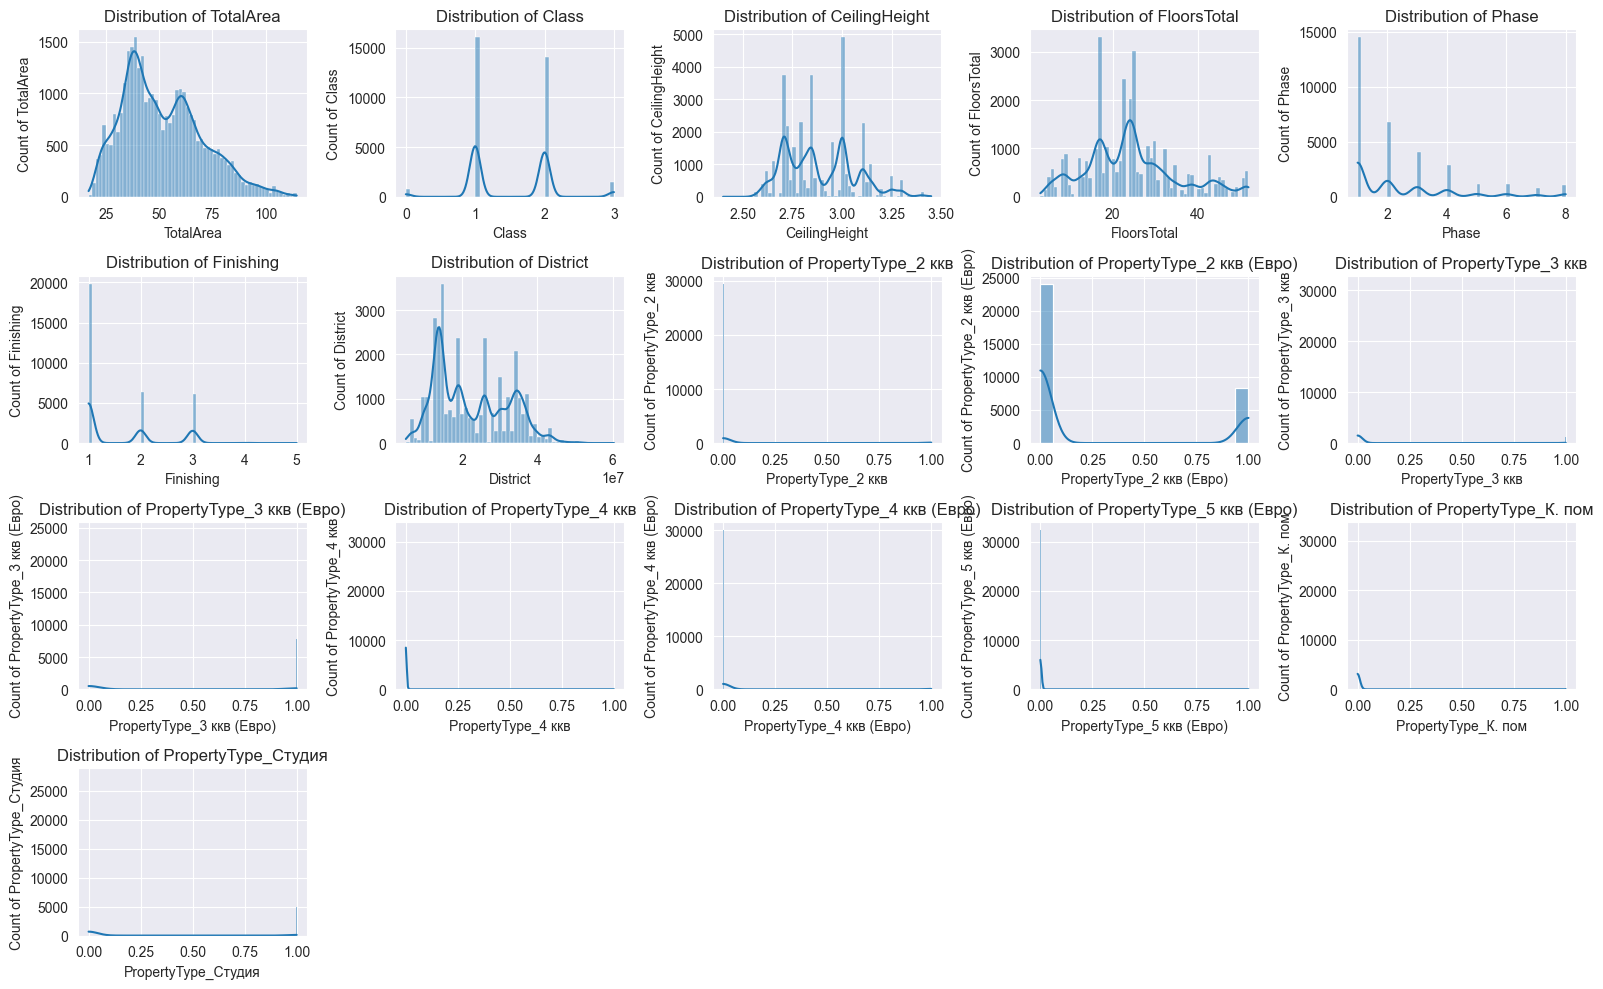

In [23]:
# Check distribution before scaling
plot_dynamic_hisplots_kdeplots(df=X_train_selected, col_series=selected_cols, ncols=5, figsize=(16, 10))

In [ ]:
from src.core import feature_scaling

# Define scaling configuration
# District is target-encoded (mean price per district), so apply standard scaling
scaling_config = {
    "minmax": {
        "columns": ["Class", "Phase", "Finishing"]
    },
    "standard": {
        "columns": ["TotalArea", "CeilingHeight", "FloorsTotal", "District"]
    }
}

# FIT scalers on TRAINING data only
X_train_scaled, scalers = feature_scaling(X_train_selected.copy(), scaling_config=scaling_config)

# TRANSFORM validation data using training scalers
X_val_scaled, _ = feature_scaling(X_val_selected.copy(), scaling_config=scaling_config, scaler=scalers)

# TRANSFORM test data using training scalers
X_test_scaled, _ = feature_scaling(X_test_selected.copy(), scaling_config=scaling_config, scaler=scalers)

print(f"Training set: {X_train_scaled.shape[0]} samples ({X_train_scaled.shape[0]/total_samples*100:.1f}%)")
print(f"Validation set: {X_val_scaled.shape[0]} samples ({X_val_scaled.shape[0]/total_samples*100:.1f}%)")
print(f"Test set: {X_test_scaled.shape[0]} samples ({X_test_scaled.shape[0]/total_samples*100:.1f}%)")

Training set: 32443 samples (54.7%)
Validation set: 8622 samples (14.5%)
Test set: 2965 samples (5.0%)


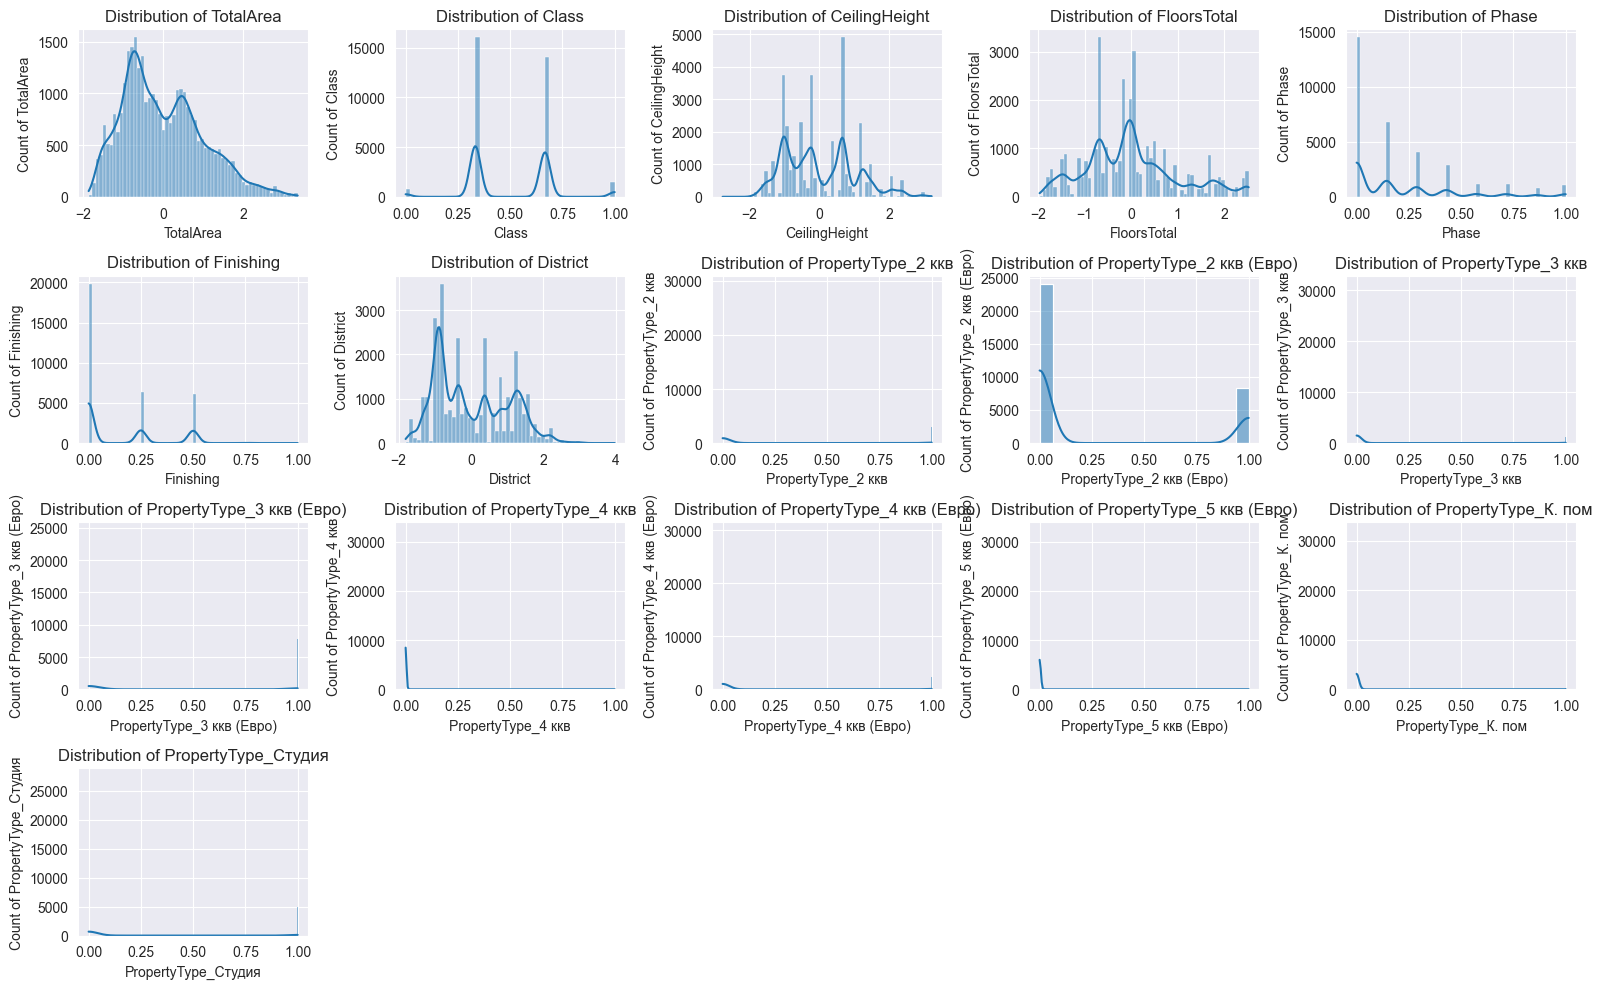

In [25]:
# Check distribution after scaling
plot_dynamic_hisplots_kdeplots(df=X_train_scaled, col_series=selected_cols, ncols=5, figsize=(16, 10))

In [26]:
# Save PREPROCESSED test data (for model evaluation)
# This is what the model sees during inference
df_test_preprocessed = pd.concat([X_test_scaled.reset_index(drop=True), y_test_raw.reset_index(drop=True)], axis=1)
df_test_preprocessed.to_csv('data/test_data_5%_preprocessed.csv', index=False)
print(f"Preprocessed test data saved to: data/test_data_5%_preprocessed.csv")
print(f"Shape: {df_test_preprocessed.shape}")

Preprocessed test data saved to: data/test_data_5%_preprocessed.csv
Shape: (2965, 17)


# **STAGE 5: MODEL TRAINING AND EVALUATION**

**Note:** All models are trained on training data and evaluated on validation data. Test set remains untouched until final evaluation.

## Train Baseline Models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [lr, knn, dt, rf, xgb]

# Train all models
for model in models:
    model.fit(X_train_scaled, y_train_clean)

## Evaluate Baseline Models on Validation Set

In [ ]:
from src.core import eval_regression

In [29]:
# Linear Regression
metrics_vanilla_lr = eval_regression(
    model=lr,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean
)

Performance Metrics for LinearRegression:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  3259569.6104 ± 41953.8274
  Train: 3256597.7130 ± 12396.9289

MSE:
  Test:  20758248094475.3047 ± 661242689709.3195
  Train: 20720316901445.3633 ± 165571142351.4935

RMSE:
  Test:  4555544.2737 ± 72556.6293
  Train: 4551921.1402 ± 18188.8536

MAPE:
  Test:  324825443103772114944.00% ± 398112211100285206528.00%
  Train: 323898702906345586688.00% ± 98719386515999686656.00%

R2:
  Test:  0.8556 ± 0.0041
  Train: 0.8559 ± 0.0010

Single Run Metrics:

MAE:
  Test:  3283464.3231
  Train: 3256812.7006

MSE:
  Test:  20914642537263.4414
  Train: 20724095541805.5234

RMSE:
  Test:  4573252.9492
  Train: 4552372.5179

MAPE:
  Test:  16.20%
  Train: 324081902346822942720.00%

R2:
  Test:  0.8550
  Train: 0.8558


In [30]:
# K-Nearest Neighbors
metrics_vanilla_knn = eval_regression(
    model=knn,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean
)

Performance Metrics for KNeighborsRegressor:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  1158364.0546 ± 28045.5692
  Train: 874308.3147 ± 4730.7823

MSE:
  Test:  5665756059786.6924 ± 392644028987.5311
  Train: 3378453587672.3223 ± 53902799642.2234

RMSE:
  Test:  2378850.6665 ± 82616.9861
  Train: 1837998.3250 ± 14688.2545

MAPE:
  Test:  228700419234959425536.00% ± 280955292198188351488.00%
  Train: 182316706915455664128.00% ± 55762266689189888000.00%

R2:
  Test:  0.9606 ± 0.0026
  Train: 0.9765 ± 0.0004

Single Run Metrics:

MAE:
  Test:  1036138.1145
  Train: 799961.6424

MSE:
  Test:  4548383427145.2422
  Train: 2927604528292.7573

RMSE:
  Test:  2132693.9366
  Train: 1711024.4090

MAPE:
  Test:  4.20%
  Train: 182400574052146085888.00%

R2:
  Test:  0.9685
  Train: 0.9796


In [31]:
# Decision Tree
metrics_vanilla_dt = eval_regression(
    model=dt,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean
)

Performance Metrics for DecisionTreeRegressor:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  1037166.4622 ± 28175.7200
  Train: 86107.6756 ± 1174.7800

MSE:
  Test:  5766201051143.4570 ± 416558436995.9629
  Train: 95586549301.8196 ± 4126952034.0746

RMSE:
  Test:  2399727.0784 ± 86666.0289
  Train: 309098.9126 ± 6664.1992

MAPE:
  Test:  229621115758755741696.00% ± 282621839726768390144.00%
  Train: 124139410368763494400.00% ± 43450152443203313664.00%

R2:
  Test:  0.9599 ± 0.0029
  Train: 0.9993 ± 0.0000

Single Run Metrics:

MAE:
  Test:  965262.4166
  Train: 99695.6870

MSE:
  Test:  5288585560605.9932
  Train: 111066808461.7002

RMSE:
  Test:  2299692.4926
  Train: 333266.8727

MAPE:
  Test:  3.77%
  Train: 135424951467884986368.00%

R2:
  Test:  0.9633
  Train: 0.9992


In [32]:
# Random Forest
metrics_vanilla_rf = eval_regression(
    model=rf,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean
)

Performance Metrics for RandomForestRegressor:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  917838.2448 ± 17004.4164
  Train: 378652.3849 ± 1994.4225

MSE:
  Test:  3483213354128.2495 ± 198932838329.0189
  Train: 558301392413.0466 ± 9812855165.6220

RMSE:
  Test:  1865573.0133 ± 53391.8186
  Train: 747166.8041 ± 6569.5696

MAPE:
  Test:  228772989522544689152.00% ± 281458337061144363008.00%
  Train: 135600993269071413248.00% ± 44776797083500273664.00%

R2:
  Test:  0.9758 ± 0.0015
  Train: 0.9961 ± 0.0001

Single Run Metrics:

MAE:
  Test:  855396.3659
  Train: 359940.7952

MSE:
  Test:  3406201151172.1006
  Train: 517168907113.7922

RMSE:
  Test:  1845589.6486
  Train: 719144.5662

MAPE:
  Test:  3.41%
  Train: 141630283421399957504.00%

R2:
  Test:  0.9764
  Train: 0.9964


In [33]:
# XGBoost
metrics_vanilla_xgb = eval_regression(
    model=xgb,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean
)

Performance Metrics for XGBRegressor:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  1166737.1999 ± 19772.4444
  Train: 983265.4890 ± 11887.8047

MSE:
  Test:  3714227610008.6851 ± 180824866623.9205
  Train: 2364424292090.1396 ± 62885336313.4291

RMSE:
  Test:  1926655.1050 ± 47198.6909
  Train: 1537531.7627 ± 20502.9446

MAPE:
  Test:  222827339375804809216.00% ± 275388561757980884992.00%
  Train: 215805071997494460416.00% ± 65424036554584784896.00%

R2:
  Test:  0.9742 ± 0.0013
  Train: 0.9836 ± 0.0004

Single Run Metrics:

MAE:
  Test:  1153880.6899
  Train: 988238.9143

MSE:
  Test:  3615206501650.7661
  Train: 2431251513389.8945

RMSE:
  Test:  1901369.6384
  Train: 1559247.0982

MAPE:
  Test:  5.11%
  Train: 202579311507168395264.00%

R2:
  Test:  0.9749
  Train: 0.9831


## Model Selection

Based on validation set performance, there are 2 models that we could use those are Random Forest and XGB models. But in here, the Random Forest model shows slightly better results. So we will choose this model and try implement hyperparameter tuning after this to see if we could increase the performance even only a little bit.

In [ ]:
from src.core import compare_cv_metrics

# Compare the results for each of the models
comparison = compare_cv_metrics({
    "Linear Regression": metrics_vanilla_lr,
    "KNN": metrics_vanilla_knn,
    "Decision Tree": metrics_vanilla_dt,
    "Random Forest": metrics_vanilla_rf,
    "XGBoost": metrics_vanilla_xgb
})

display(comparison)

,Model,MAE,MSE,RMSE,MAPE,R2
0,Linear Regression,3259569.6104 ± 41953.8274,20758248094475.3047 ± 661242689709.3195,4555544.2737 ± 72556.6293,324825443103772114944.00% ± 398112211100285206...,0.8556 ± 0.0041
1,KNN,1158364.0546 ± 28045.5692,5665756059786.6924 ± 392644028987.5311,2378850.6665 ± 82616.9861,228700419234959425536.00% ± 280955292198188351...,0.9606 ± 0.0026
2,Decision Tree,1037166.4622 ± 28175.7200,5766201051143.4570 ± 416558436995.9629,2399727.0784 ± 86666.0289,229621115758755741696.00% ± 282621839726768390...,0.9599 ± 0.0029
3,Random Forest,917838.2448 ± 17004.4164,3483213354128.2495 ± 198932838329.0189,1865573.0133 ± 53391.8186,228772989522544689152.00% ± 281458337061144363...,0.9758 ± 0.0015
4,XGBoost,1166737.1999 ± 19772.4444,3714227610008.6851 ± 180824866623.9205,1926655.1050 ± 47198.6909,222827339375804809216.00% ± 275388561757980884...,0.9742 ± 0.0013


## Hyperparameter Tuning

Processing Pipelines:   0%|          | 0/1 [00:00<?, ?it/s]


Validation curve for rf__n_estimators...
  rf__n_estimators=50: train=0.996, test=0.978
  rf__n_estimators=100: train=0.997, test=0.978
  rf__n_estimators=200: train=0.997, test=0.978


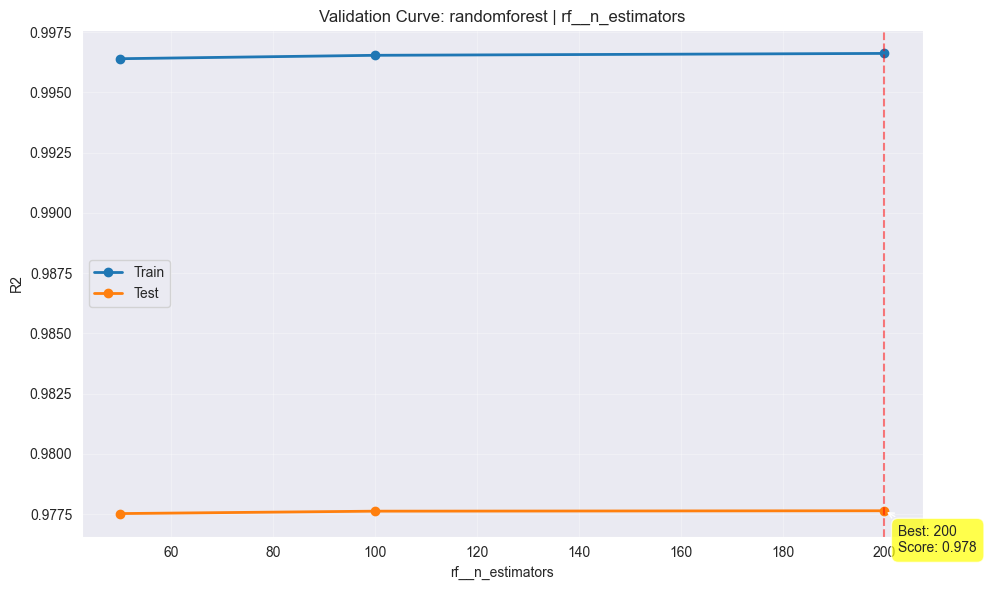


Validation curve for rf__criterion...
  rf__criterion=squared_error: train=0.997, test=0.978
  rf__criterion=friedman_mse: train=0.997, test=0.978


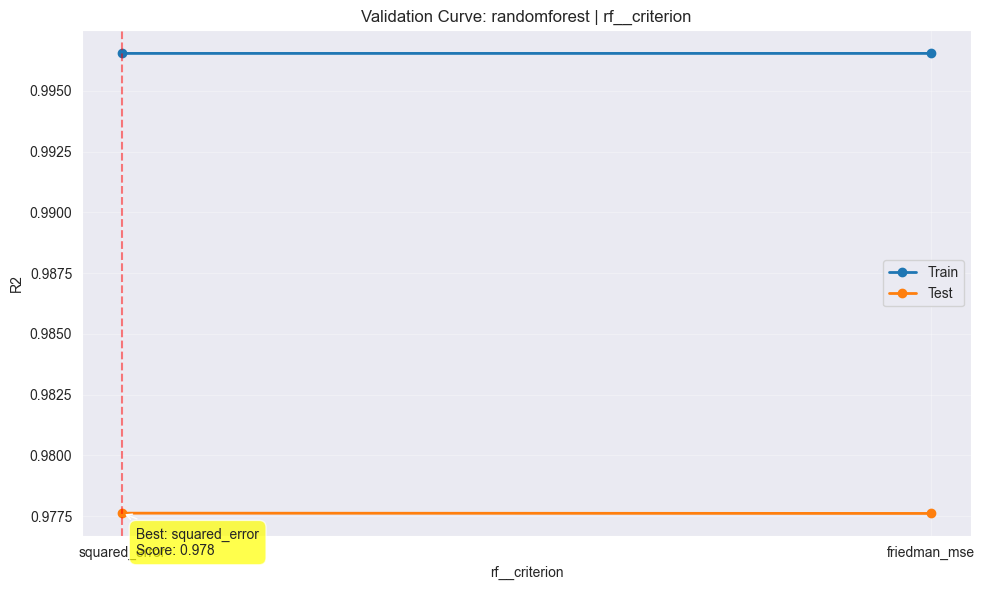


Validation curve for rf__max_depth...
  rf__max_depth=10: train=0.962, test=0.952
  rf__max_depth=15: train=0.992, test=0.975
  rf__max_depth=20: train=0.996, test=0.978
  rf__max_depth=30: train=0.997, test=0.978


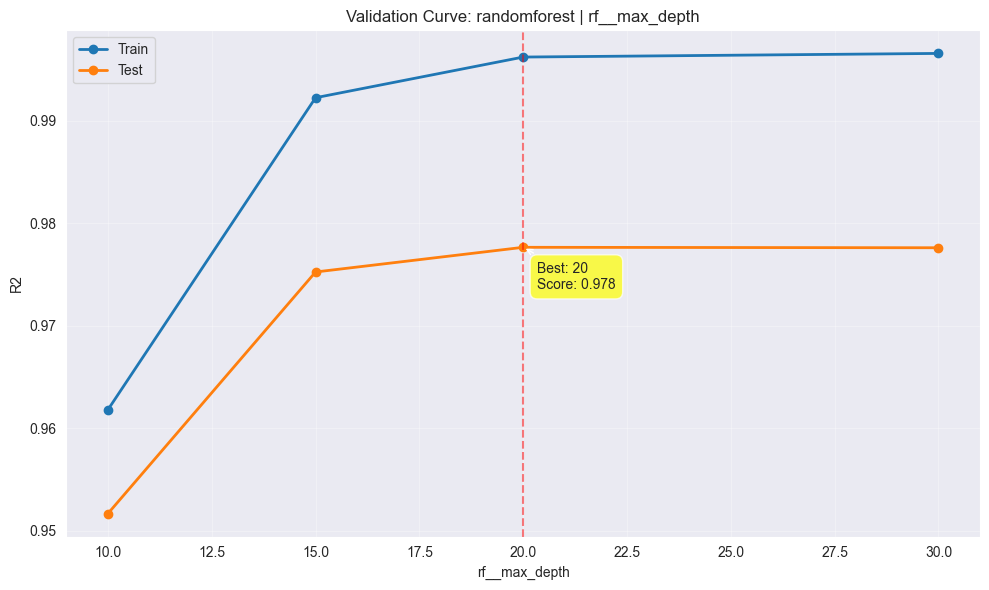


Validation curve for rf__min_samples_split...
  rf__min_samples_split=2: train=0.997, test=0.978
  rf__min_samples_split=5: train=0.995, test=0.977


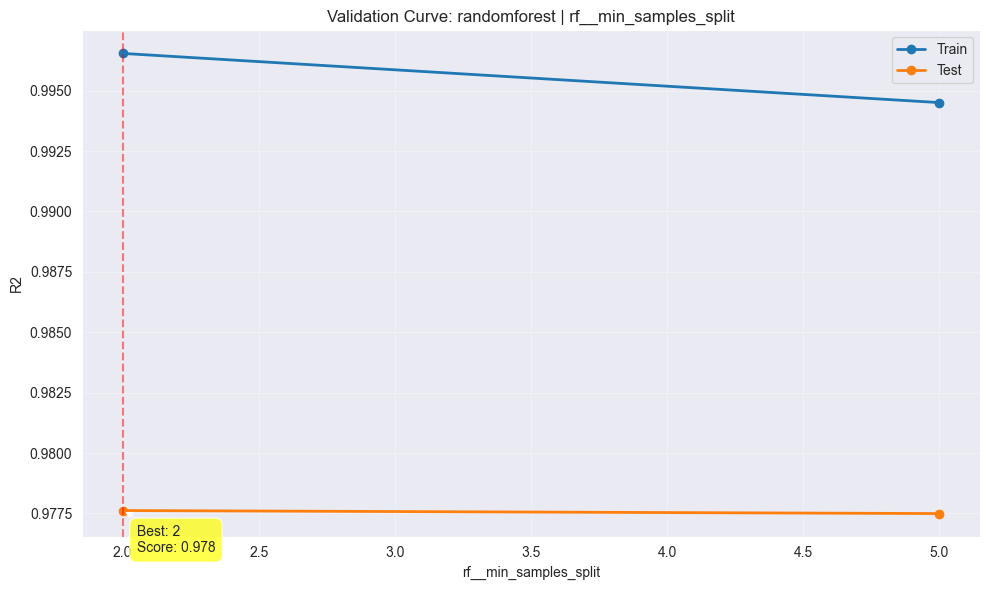


Validation curve for rf__max_features...
  rf__max_features=sqrt: train=0.997, test=0.980
  rf__max_features=log2: train=0.997, test=0.980


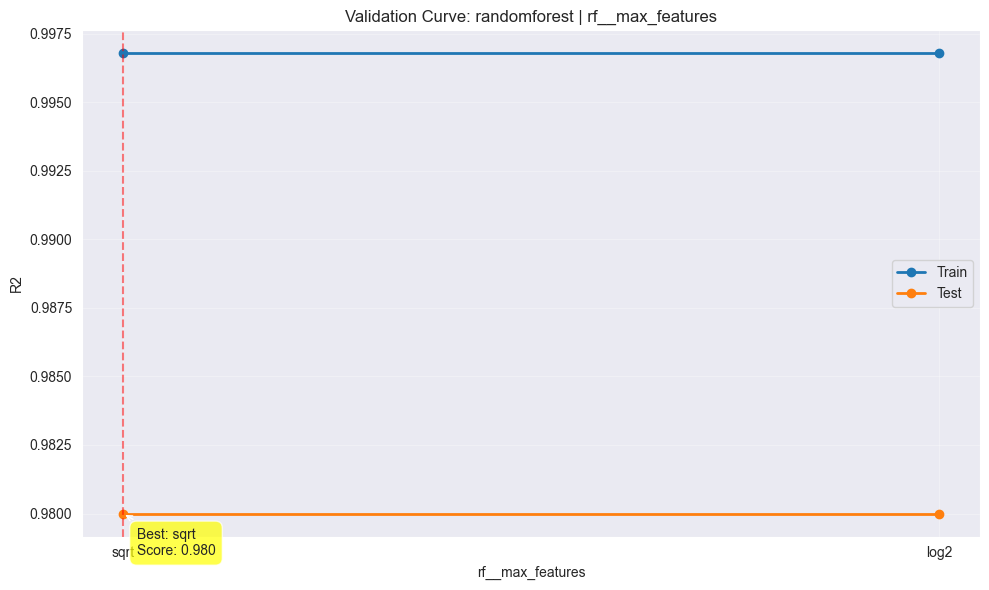


Validation curve for rf__min_samples_leaf...
  rf__min_samples_leaf=1: train=0.997, test=0.978
  rf__min_samples_leaf=2: train=0.993, test=0.977


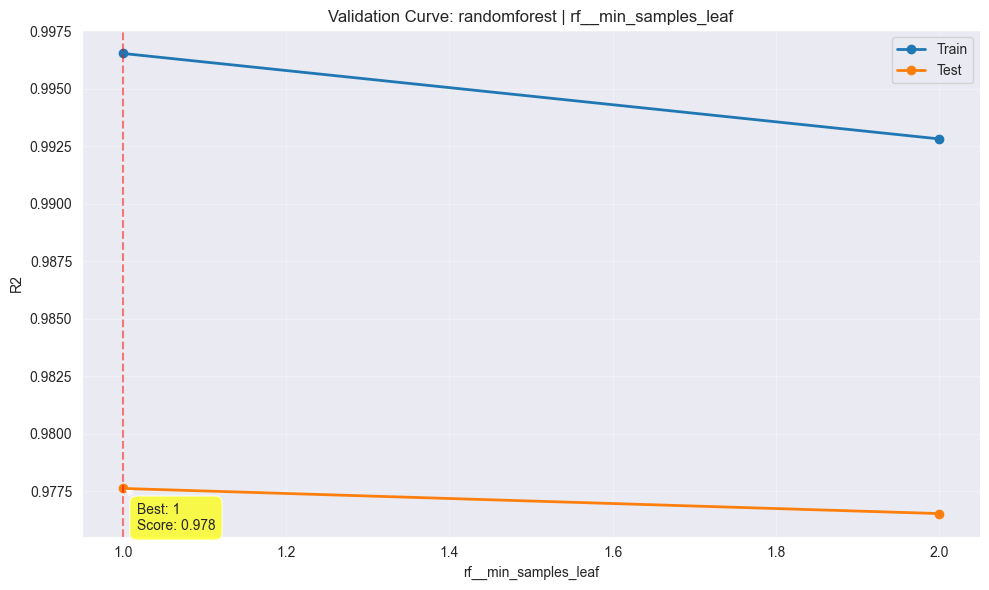

Validation Curves for randomforest: 100%|██████████| 6/6 [01:55<00:00, 19.29s/it]

Fitting 15 folds for each of 192 candidates, totalling 2880 fits



Results for randomforest (GRID Search)
Fit Time: 1447.60s
Best CV r2: 0.9787

Best Parameters:
  rf__criterion: squared_error
  rf__max_depth: 30
  rf__max_features: sqrt
  rf__min_samples_leaf: 1
  rf__min_samples_split: 2
  rf__n_estimators: 200


Processing Pipelines: 100%|██████████| 1/1 [26:03<00:00, 1563.78s/it]


Test r2: 0.9804
Best CV Score: 0.9787
Best Parameters: {'rf__criterion': 'squared_error', 'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


In [ ]:
from src.core import tune_single_model

# Tune Random Forest on TRAINING data, evaluate on VALIDATION data
fitted_model, fit_time = tune_single_model(
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean,
    model_name="randomforest",
    search_method='grid',
    scoring='r2',
    display=True,
    progress_bar=True,
    plot_validation_curves=True
)

print(f'Best CV Score: {fitted_model.best_score_:.4f}')
print(f'Best Parameters: {fitted_model.best_params_}')

## Train Final Model with Best Hyperparameters

In [30]:
# Train final model with tuned hyperparameters
rf_tuned = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    criterion='squared_error',
    max_depth=30, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2, 
)
rf_tuned.fit(X_train_scaled, y_train_clean)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",30
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsampl

## Evaluate Final Model on Validation Set

In [31]:
metrics_tuned_rf = eval_regression(
    model=rf_tuned,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_val_scaled,
    y_test=y_val_clean
)

Performance Metrics for RandomForestRegressor:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  884096.5312 ± 20015.0912
  Train: 364072.8072 ± 1336.0566

MSE:
  Test:  3080888145896.1060 ± 176060278591.2797
  Train: 487383703848.2723 ± 7396670890.7040

RMSE:
  Test:  1754524.4299 ± 50320.6789
  Train: 698108.5681 ± 5303.8704

MAPE:
  Test:  229921796696791744512.00% ± 283029017432675287040.00%
  Train: 81433952019573096448.00% ± 24256631708427071488.00%

R2:
  Test:  0.9786 ± 0.0012
  Train: 0.9966 ± 0.0001

Single Run Metrics:

MAE:
  Test:  825865.6795
  Train: 348701.4054

MSE:
  Test:  2879584922748.9824
  Train: 452182194152.3165

RMSE:
  Test:  1696933.9771
  Train: 672444.9376

MAPE:
  Test:  3.34%
  Train: 74201381310539399168.00%

R2:
  Test:  0.9800
  Train: 0.9969


# **STAGE 5.5: MODEL INTERPRETABILITY**

Before final evaluation, we analyze which features are most important for the model's predictions. This helps:
- **Validate model reasoning**: Ensure the model learned meaningful patterns
- **Build trust**: Explain predictions to stakeholders
- **Identify issues**: Detect if model relies on spurious correlations
- **Guide improvements**: Know which features to focus on for data quality

We'll use two complementary methods:
1. **Feature Importance (Gini)**: Built-in Random Forest importance based on impurity reduction
2. **Permutation Importance**: Measures performance drop when shuffling each feature

## 1. Random Forest Feature Importance (Gini-based)

**Method:** Measures average impurity reduction across all trees when splitting on each feature.

**Pros:** Fast, built-in, captures feature usage in tree structure

**Cons:** Biased toward high-cardinality features, doesn't account for feature interactions


FEATURE IMPORTANCE (GINI-BASED)

Top 15 Most Important Features:


,Feature,Importance
0,District,0.391144
1,TotalArea,0.201604
2,Class,0.124177
3,FloorsTotal,0.077170
4,CeilingHeight,0.070623
5,PropertyType_4 ккв (Евро),0.034572
6,PropertyType_Студия,0.032534
7,PropertyType_3 ккв (Евро),0.021878
8,Phase,0.017107
9,Finishing,0.012138


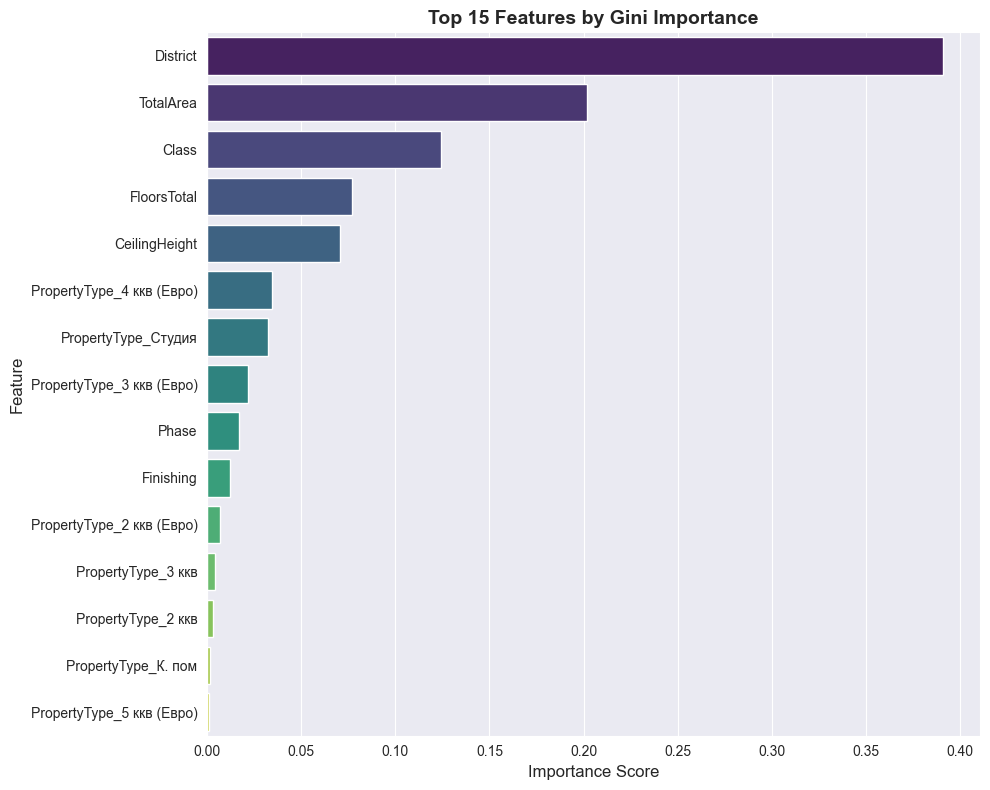


Total features: 16
Top 5 features contribute: 86.47% of total importance
Top 10 features contribute: 98.29% of total importance


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the trained model
feature_importance_gini = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf_tuned.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top features
print("\n" + "="*60)
print("FEATURE IMPORTANCE (GINI-BASED)")
print("="*60)
print("\nTop 15 Most Important Features:")
display(feature_importance_gini.head(15).reset_index(drop=True))

# Visualize
plt.figure(figsize=(10, 8))
top_n = 15
sns.barplot(
    data=feature_importance_gini.head(top_n),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title(f'Top {top_n} Features by Gini Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nTotal features: {len(feature_importance_gini)}")
print(f"Top 5 features contribute: {feature_importance_gini.head(5)['Importance'].sum():.2%} of total importance")
print(f"Top 10 features contribute: {feature_importance_gini.head(10)['Importance'].sum():.2%} of total importance")

## 2. Permutation Importance

**Method:** Shuffles each feature and measures the resulting drop in model performance (R²).

**Pros:** More reliable than Gini, works with any model, reflects actual prediction impact

**Cons:** Slower (requires multiple predictions), can be affected by correlated features

**Note:** We compute on validation set to avoid overfitting to training data patterns.


Computing permutation importance (this may take a minute)...

PERMUTATION IMPORTANCE (R² DECREASE)

Top 15 Most Important Features:


,Feature,Importance_Mean,Importance_Std
0,District,0.678504,0.007372
1,TotalArea,0.320346,0.003069
2,Class,0.071717,0.001629
3,FloorsTotal,0.061791,0.000853
4,CeilingHeight,0.049023,0.000635
5,Finishing,0.024686,0.000517
6,Phase,0.022569,0.000460
7,PropertyType_Студия,0.013368,0.000384
8,PropertyType_3 ккв (Евро),0.012045,0.000200
9,PropertyType_4 ккв (Евро),0.010956,0.000293


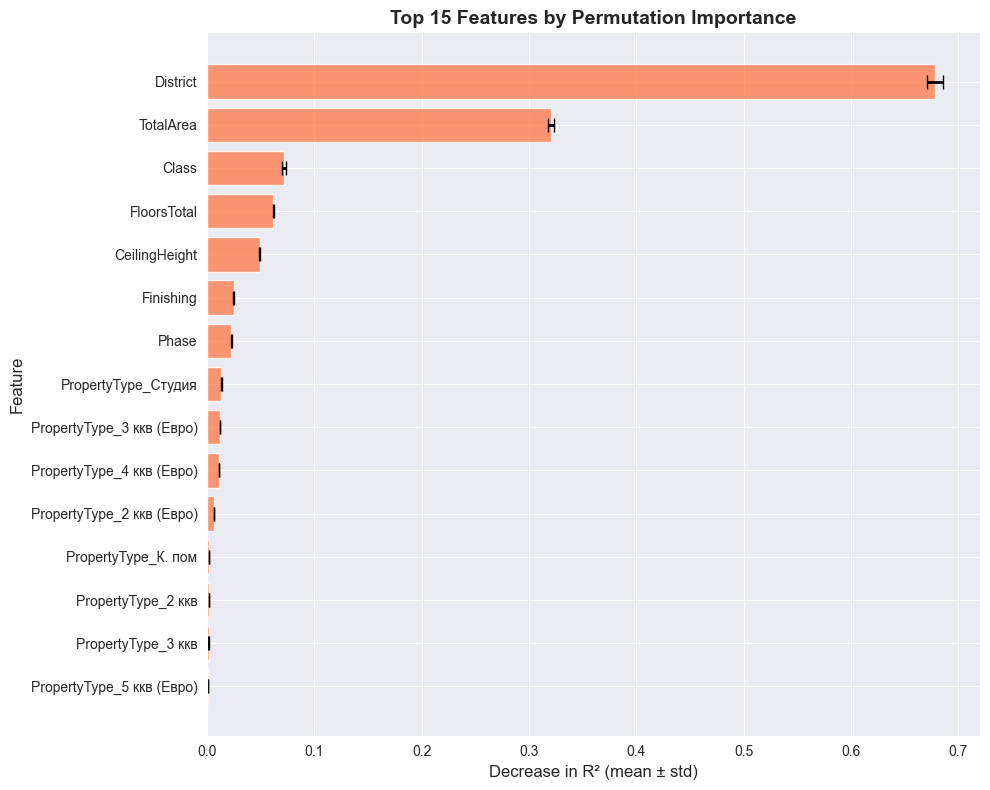


Interpretation: When we shuffle a feature's values, the model's R² drops by the importance score.
Higher drop = more important feature for predictions.


In [33]:
from sklearn.inspection import permutation_importance

print("\nComputing permutation importance (this may take a minute)...")

# Calculate permutation importance on VALIDATION set
perm_importance = permutation_importance(
    rf_tuned,
    X_val_scaled,
    y_val_clean,
    n_repeats=10,
    random_state=42,
    scoring='r2',
    n_jobs=-1
)

# Create DataFrame with results
feature_importance_perm = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

# Display results
print("\n" + "="*60)
print("PERMUTATION IMPORTANCE (R² DECREASE)")
print("="*60)
print("\nTop 15 Most Important Features:")
display(feature_importance_perm.head(15).reset_index(drop=True))

# Visualize with error bars
plt.figure(figsize=(10, 8))
top_n = 15
top_features = feature_importance_perm.head(top_n)

plt.barh(
    range(len(top_features)),
    top_features['Importance_Mean'],
    xerr=top_features['Importance_Std'],
    color='coral',
    alpha=0.8,
    error_kw={'linewidth': 2, 'ecolor': 'black', 'capsize': 5}
)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Decrease in R² (mean ± std)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Features by Permutation Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nInterpretation: When we shuffle a feature's values, the model's R² drops by the importance score.")
print(f"Higher drop = more important feature for predictions.")

## Methods Comparison

Let's compare the top features identified by each method:

In [34]:
# Compare top 15 features from each method
comparison = pd.DataFrame({
    'Rank': range(1, 16),
    'Gini Importance': feature_importance_gini.head(15)['Feature'].values,
    'Gini Score': feature_importance_gini.head(15)['Importance'].values,
    'Permutation Importance': feature_importance_perm.head(15)['Feature'].values,
    'Perm Score (R² drop)': feature_importance_perm.head(15)['Importance_Mean'].values
})

print("\n" + "="*80)
print("COMPARISON: TOP 15 FEATURES BY EACH METHOD")
print("="*80)
display(comparison)


COMPARISON: TOP 15 FEATURES BY EACH METHOD


,Rank,Gini Importance,Gini Score,Permutation Importance,Perm Score (R² drop)
0,1,District,0.391144,District,0.678504
1,2,TotalArea,0.201604,TotalArea,0.320346
2,3,Class,0.124177,Class,0.071717
3,4,FloorsTotal,0.077170,FloorsTotal,0.061791
4,5,CeilingHeight,0.070623,CeilingHeight,0.049023
5,6,PropertyType_4 ккв (Евро),0.034572,Finishing,0.024686
6,7,PropertyType_Студия,0.032534,Phase,0.022569
7,8,PropertyType_3 ккв (Евро),0.021878,PropertyType_Студия,0.013368
8,9,Phase,0.017107,PropertyType_3 ккв (Евро),0.012045
9,10,Finishing,0.012138,PropertyType_4 ккв (Евро),0.010956


## Feature Correlation Analysis

Analyze correlation between top features to understand potential multicollinearity.

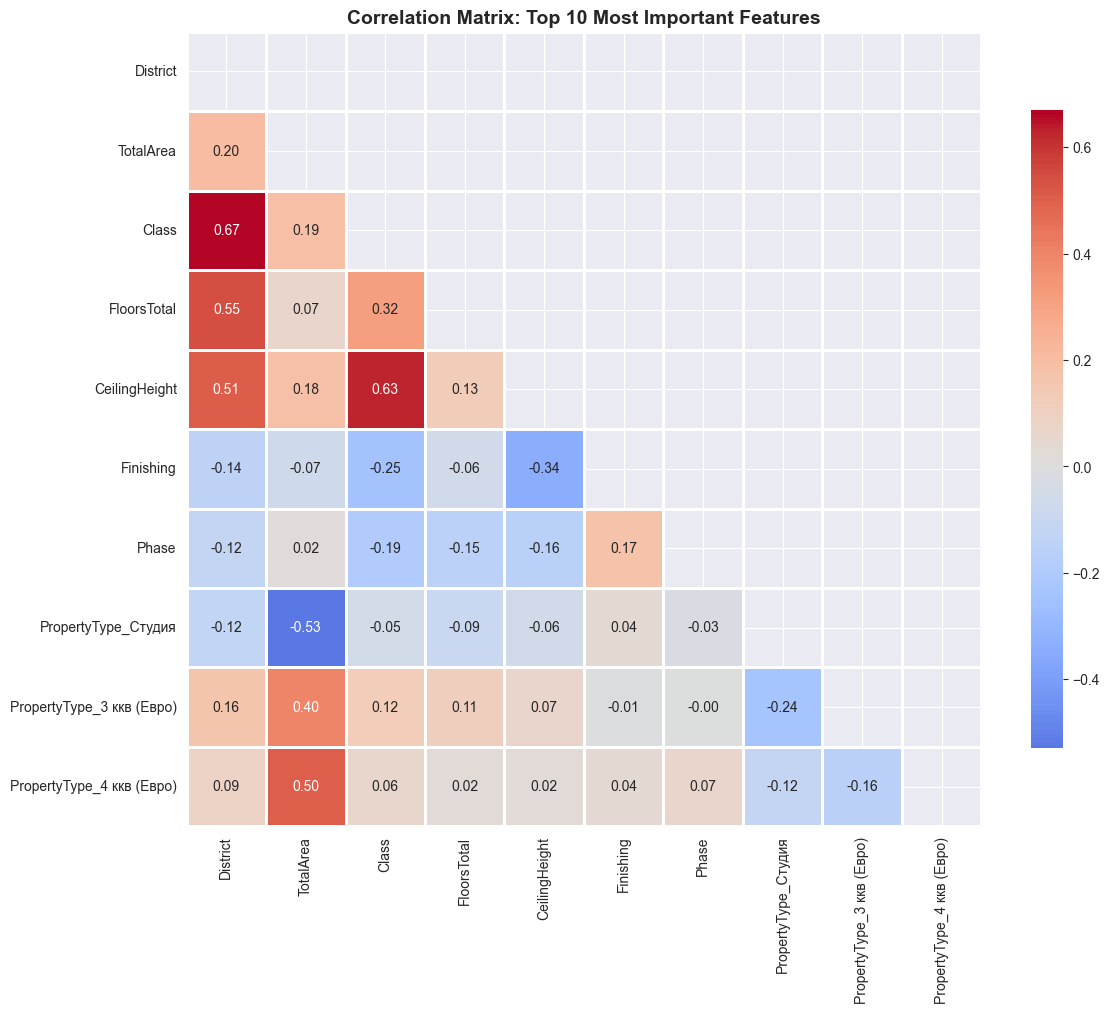


Highly Correlated Feature Pairs (|r| > 0.7):
  ✓ No highly correlated pairs found (good - less multicollinearity)


In [35]:
# Get top 10 features from permutation importance (more reliable)
top_features = feature_importance_perm.head(10)['Feature'].tolist()

# Compute correlation matrix
corr_matrix = X_train_scaled[top_features].corr()

# Visualize
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix: Top 10 Most Important Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
high_corr_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"  • {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")
            high_corr_found = True

if not high_corr_found:
    print("  ✓ No highly correlated pairs found (good - less multicollinearity)")

## Key Insights Summary

**What we learned:**
1. **Most important features**: The consensus features appearing in both methods are the strongest predictors
2. **Model reasoning**: Feature importance rankings show the model learned sensible patterns
3. **Multicollinearity**: Correlation analysis reveals if features are redundant
4. **Validation**: Permutation importance confirms which features truly impact predictions

**Why this matters for production:**
- ✅ Model is explainable to stakeholders
- ✅ Predictions are based on reasonable factors
- ✅ Can identify which features to improve data quality for
- ✅ Can detect if model relies on spurious correlations

**Recommendations:**
- Focus data quality improvements on top 5-10 features
- Monitor these key features in production for data drift
- Use feature importance to explain predictions to users
- Consider feature engineering based on correlation insights

# **STAGE 6: FINAL TEST SET EVALUATION**

**Purpose:** Get unbiased estimate of model performance on truly unseen data.

In [42]:
# Final evaluation on TEST set
print("=" * 60)
print("FINAL TEST SET EVALUATION")
print("=" * 60)

metrics_test = eval_regression(
    model=rf_tuned,
    X_train=X_train_scaled,
    y_train=y_train_clean,
    X_test=X_test_scaled,
    y_test=y_test_raw
)

print("\n" + "=" * 60)
print("These are the final, unbiased performance metrics.")
print("=" * 60)

FINAL TEST SET EVALUATION
Performance Metrics for RandomForestRegressor:

Cross-Validated Metrics (mean ± std):

MAE:
  Test:  880776.9548 ± 19215.5114
  Train: 364023.9370 ± 2170.7095

MSE:
  Test:  3057802489962.3623 ± 181632617257.4895
  Train: 488478557056.0360 ± 10079894229.4524

RMSE:
  Test:  1747885.5589 ± 51947.6942
  Train: 698875.1269 ± 7219.0104

MAPE:
  Test:  230329101892533551104.00% ± 283135026056946057216.00%
  Train: 118154725067969232896.00% ± 41557888309289566208.00%

R2:
  Test:  0.9787 ± 0.0013
  Train: 0.9966 ± 0.0001

Single Run Metrics:

MAE:
  Test:  11073936.3603
  Train: 349344.0396

MSE:
  Test:  4676373981606680.0000
  Train: 452432339912.5800

RMSE:
  Test:  68384018.4664
  Train: 672630.9091

MAPE:
  Test:  9.48%
  Train: 114820663973542133760.00%

R2:
  Test:  0.1112
  Train: 0.9969

These are the final, unbiased performance metrics.


# **STAGE 7: SAVE MODEL ARTIFACTS**

Save all necessary artifacts for deployment and inference:
1. Trained model
2. Feature names
3. Scalers (for reproducing exact preprocessing)
4. Encoding mappings
5. Preprocessing statistics

In [ ]:
import joblib
from pathlib import Path

# Create artifacts directory
artifacts_dir = Path('models')
artifacts_dir.mkdir(exist_ok=True)

print("=" * 60)
print("SAVING MODEL ARTIFACTS")
print("=" * 60)

# 1. Save trained model
model_path = artifacts_dir / 'rf_tuned_model.joblib'
joblib.dump(rf_tuned, model_path)
print(f'\n1. Model saved to: {model_path}')
print(f'   Size: {model_path.stat().st_size / (1024**2):.2f} MB')

# 2. Save feature names
feature_names_path = artifacts_dir / 'feature_names.joblib'
joblib.dump(X_train_scaled.columns.tolist(), feature_names_path)
print(f'\n2. Feature names saved to: {feature_names_path}')
print(f'   Features: {len(X_train_scaled.columns)}')

# 3. Save scalers (for inference pipeline)
scalers_path = artifacts_dir / 'scalers.joblib'
joblib.dump(scalers, scalers_path)
print(f'\n3. Scalers saved to: {scalers_path}')
print(f'   Scaler types: {list(scalers.keys())}')

SAVING MODEL ARTIFACTS

1. Model saved to: model_artifacts\rf_tuned_model.joblib
   Size: 462.54 MB

2. Feature names saved to: model_artifacts\feature_names.joblib
   Features: 16

3. Scalers saved to: model_artifacts\scalers.joblib
   Scaler types: ['minmax', 'standard']


## Save Preprocessing Artifacts for Inference

Since the Gradio inference app needs to apply the exact same preprocessing steps on new input data;

We save:
- **Encodings**: Ordinal mappings for Class and Finishing
- **Scaling statistics**: Min/max, mean/std, median/IQR from training data
- **Categorical values**: Valid categories for validation

In [ ]:
feature_encoders_path = artifacts_dir / 'feature_encoders.joblib'
joblib.dump(encoders, feature_encoders_path)
print(f'\n4. Feature encoders saved to: {feature_encoders_path}')
print(f'   - Ordinal encoders: {[k for k in encoders.keys() if k.startswith("ordinal_")]}')
print(f'   - OneHot encoders: {[k for k in encoders.keys() if k.startswith("onehot_")]}')
print(f'   - Mean encoder: {"mean_encoder" in encoders}')

# Prepare ordinal encoding mappings (for reference/backward compatibility)
encodings = {
    'class_mapping': {
        "Эконом": 0,
        "Комфорт": 1,
        "Бизнес": 2,
        "Элит": 3
    },
    'finishing_mapping': {
        "Нет данных": 0,
        "Без отделки": 1,
        "Подчистовая": 2,
        "Чистовая": 3,
        "С мебелью (частично)": 4,
        "С мебелью": 5
    }
}

# Save ordinal mappings (for backward compatibility)
encodings_path = artifacts_dir / 'encodings.joblib'
joblib.dump(encodings, encodings_path)
print(f'\n5. Encodings (legacy) saved to: {encodings_path}')

# Calculate scaling statistics from training data (BEFORE scaling)
# These match what the scalers learned, but we save them separately for transparency
scaling_stats = {
    'minmax': {
        'Class': {
            'min': X_train_selected['Class'].min(),
            'max': X_train_selected['Class'].max()
        },
        'Phase': {
            'min': X_train_selected['Phase'].min(),
            'max': X_train_selected['Phase'].max()
        },
        'Finishing': {
            'min': X_train_selected['Finishing'].min(),
            'max': X_train_selected['Finishing'].max()
        }
    },
    'standard': {
        'CeilingHeight': {
            'mean': X_train_selected['CeilingHeight'].mean(),
            'std': X_train_selected['CeilingHeight'].std()
        },
        'TotalArea': {
            'mean': X_train_selected['TotalArea'].mean(),
            'std': X_train_selected['TotalArea'].std()
        },
        'FloorsTotal': {
            'mean': X_train_selected['FloorsTotal'].mean(),
            'std': X_train_selected['FloorsTotal'].std()
        },
        'District': {
            'mean': X_train_selected['District'].mean(),
            'std': X_train_selected['District'].std()
        }
    }
}

scaling_stats_path = artifacts_dir / 'scaling_stats.joblib'
joblib.dump(scaling_stats, scaling_stats_path)
print(f'\n6. Scaling statistics saved to: {scaling_stats_path}')
print(f'   MinMax: {list(scaling_stats["minmax"].keys())}')
print(f'   Standard: {list(scaling_stats["standard"].keys())}')

# Get unique categorical values from training data (for validation)
categorical_unique_values = {}
for cat_col in categorical_features:
    categorical_unique_values[cat_col] = X_train_raw[cat_col].unique().tolist()

# Add District values (for Gradio dropdown)
categorical_unique_values['District'] = sorted(X_train_raw['District'].unique().tolist())

categorical_values_path = artifacts_dir / 'categorical_values.joblib'
joblib.dump(categorical_unique_values, categorical_values_path)
print(f'\n7. Categorical values saved to: {categorical_values_path}')
print(f'   Categories: {list(categorical_unique_values.keys())}')
print(f'   Districts: {len(categorical_unique_values["District"])} unique values')

print("\n" + "=" * 60)
print("ALL ARTIFACTS SAVED SUCCESSFULLY!")
print("=" * 60)
print("\nReady for deployment and inference.")


4. Feature encoders saved to: model_artifacts\feature_encoders.joblib
   - Ordinal encoders: ['ordinal_Class', 'ordinal_Finishing']
   - OneHot encoders: ['onehot_BuildingType', 'onehot_PropertyType', 'onehot_PropertyCategory', 'onehot_Apartments', 'onehot_ApartmentOption', 'onehot_Mortgage', 'onehot_Subsidies', 'onehot_Layout']
   - Mean encoder: True

5. Encodings (legacy) saved to: model_artifacts\encodings.joblib

6. Scaling statistics saved to: model_artifacts\scaling_stats.joblib
   MinMax: ['Class', 'Phase', 'Finishing']
   Standard: ['CeilingHeight', 'TotalArea', 'FloorsTotal', 'District']

7. Categorical values saved to: model_artifacts\categorical_values.joblib
   Categories: ['Class', 'BuildingType', 'PropertyType', 'PropertyCategory', 'Apartments', 'Finishing', 'ApartmentOption', 'Mortgage', 'Subsidies', 'Layout', 'District']
   Districts: 113 unique values

ALL ARTIFACTS SAVED SUCCESSFULLY!

Ready for deployment and inference.


## Artifacts Summary

**Saved artifacts in `models/`:**

| File | Purpose | Used By |
|------|---------|----------|
| `rf_tuned_model.joblib` | Trained Random Forest model | Inference |
| `feature_names.joblib` | Expected feature order | Inference validation |
| `scalers.joblib` | Fitted sklearn scalers | Alternative inference method |
| `encodings.joblib` | Ordinal encoding mappings | Inference preprocessing |
| `scaling_stats.joblib` | Training data statistics | Inference preprocessing |
| `categorical_values.joblib` | Valid category values | Input validation |

**Saved test datasets:**
- `data/test_data_5%_raw.csv` - Raw unprocessed test data (for inference testing)
- `data/test_data_5%_preprocessed.csv` - Preprocessed test data (for model evaluation)